In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv("C:\\Users\\Nahid\\Desktop\\EDA & Model\\churn.csv")
df = dataset
dataset.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
dataset.shape

(10000, 14)

In [5]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('---'*20)

RowNumber
[    1     2     3 ...  9998  9999 10000]
------------------------------------------------------------
CustomerId
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
------------------------------------------------------------
Surname
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
------------------------------------------------------------
CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 

In [8]:
dataset['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

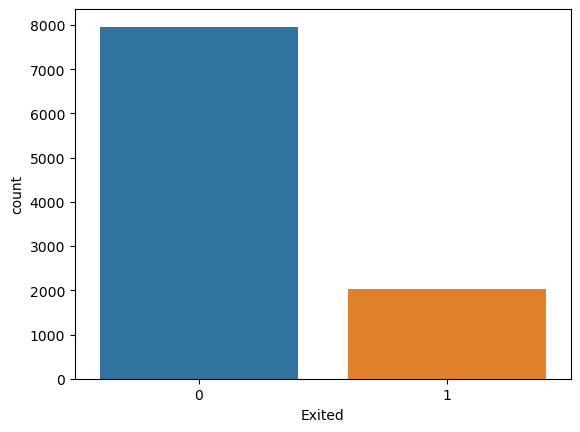

In [9]:
sns.countplot(data=dataset, x='Exited')


In [10]:
### numerical 
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [11]:
### categorical
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['Surname', 'Geography', 'Gender']

In [118]:
category_cols=['Geography', 'Gender']

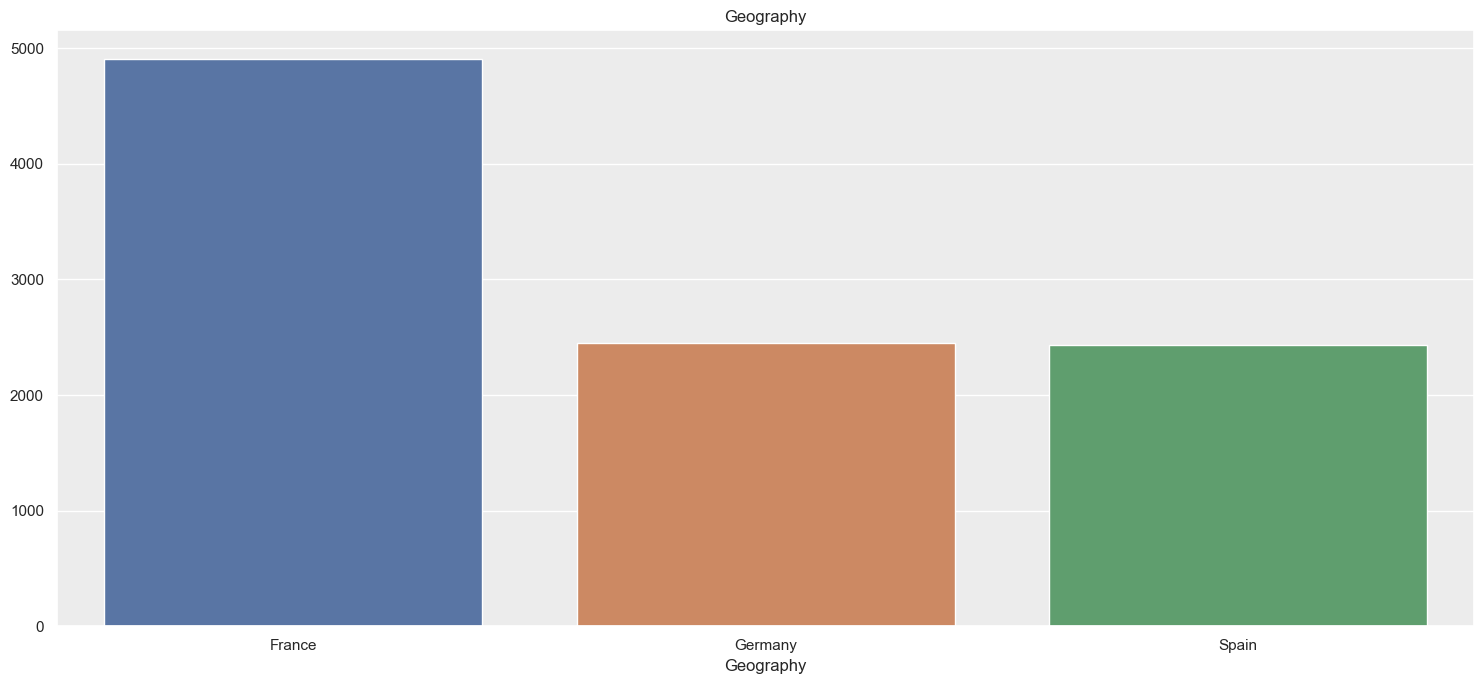

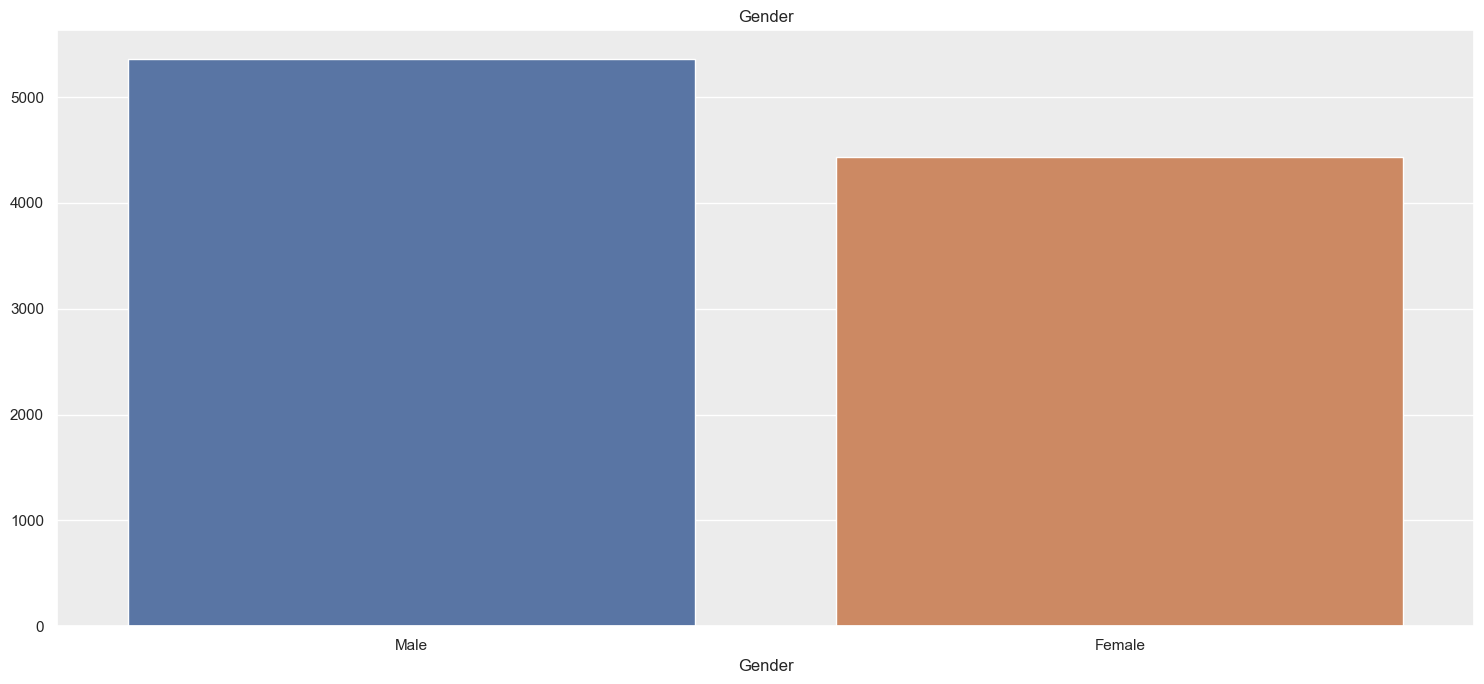

In [119]:
for col in category_cols:
    plt.figure(figsize=(15, 7))
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [13]:
dataset.corr(numeric_only = 'true')

RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067       0.007246   0.000599        0.012044   
CustomerId      -0.012419       0.016972  -0.014025        0.001665   
CreditScore      0.006268       0.012238  -0.005458        0.025651   
Age              0.028308      -0.030680  -0.011721        0.085472   
Tenure          -0.012254       0.013444   0.022583       -0.028362   
Balance          1.000000      -0.304180  -0.014858       -0.010084   
NumOfProducts   -0.304180       1.000000   0.003183        0.009612   
HasCrCard       -0.014858       0.003183   1.000000       -0.011866   
IsActiveMember  -0.010084       0.009612  -0.011866        1.000000   
EstimatedSalary  0.012797       0.014204  -0.009933       -0.011421   
Exited           0.118533      -0.047820  -0.007138       -0.156128   

                 EstimatedSalary    Exited  
RowNumber              -0.005988 -0.016571  
CustomerId              0.015271 -0.006248  
CreditScore            -0.001384 -0.027094  
Age                    -0.007201  0.285323  
Tenure                  0.007784 -0.014001  
Balance                 0.012797  0.118533  
NumOfProducts           0.014204 -0.047820  
HasCrCard              -0.009933 -0.007138  
IsActiveMember         -0.011421 -0.156128  
EstimatedSalary         1.000000  0.012097  
Exited                  0.012097  1.000000

<Axes: >

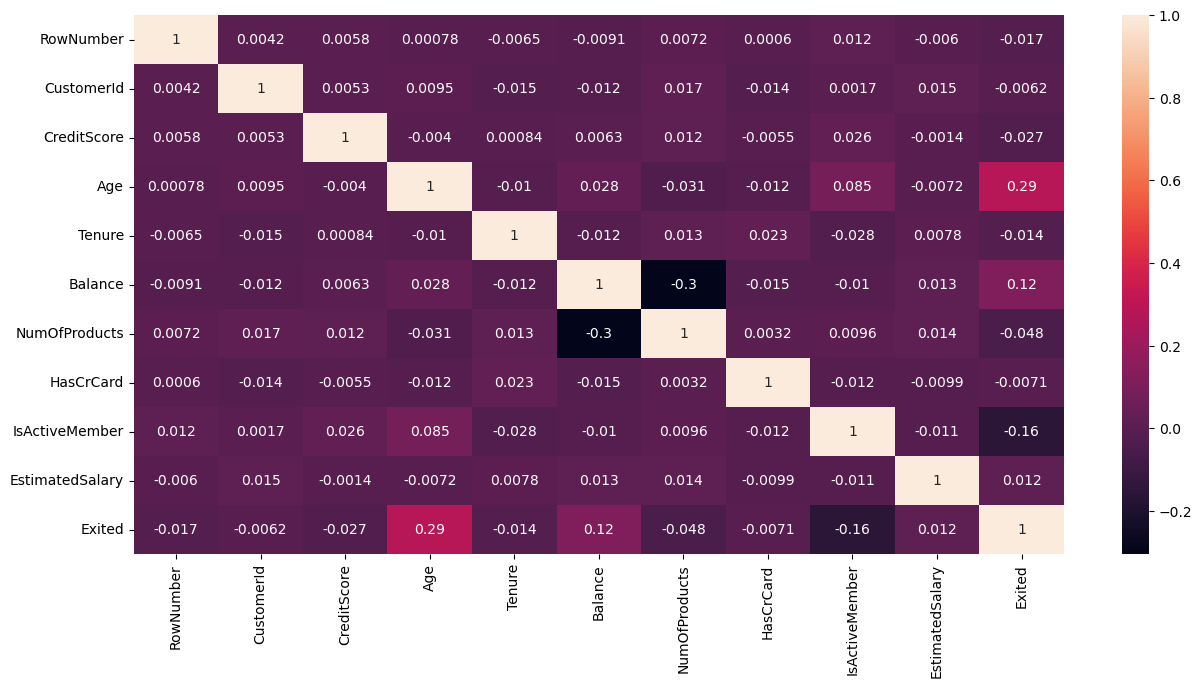

In [14]:
cor_mat=df.corr(numeric_only = True)
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [15]:
num_features=['CreditScore', 'Tenure', 'Balance', 'NumOfProducts',
       'Age', 'HasCrCard', 'IsActiveMember','EstimatedSalary']

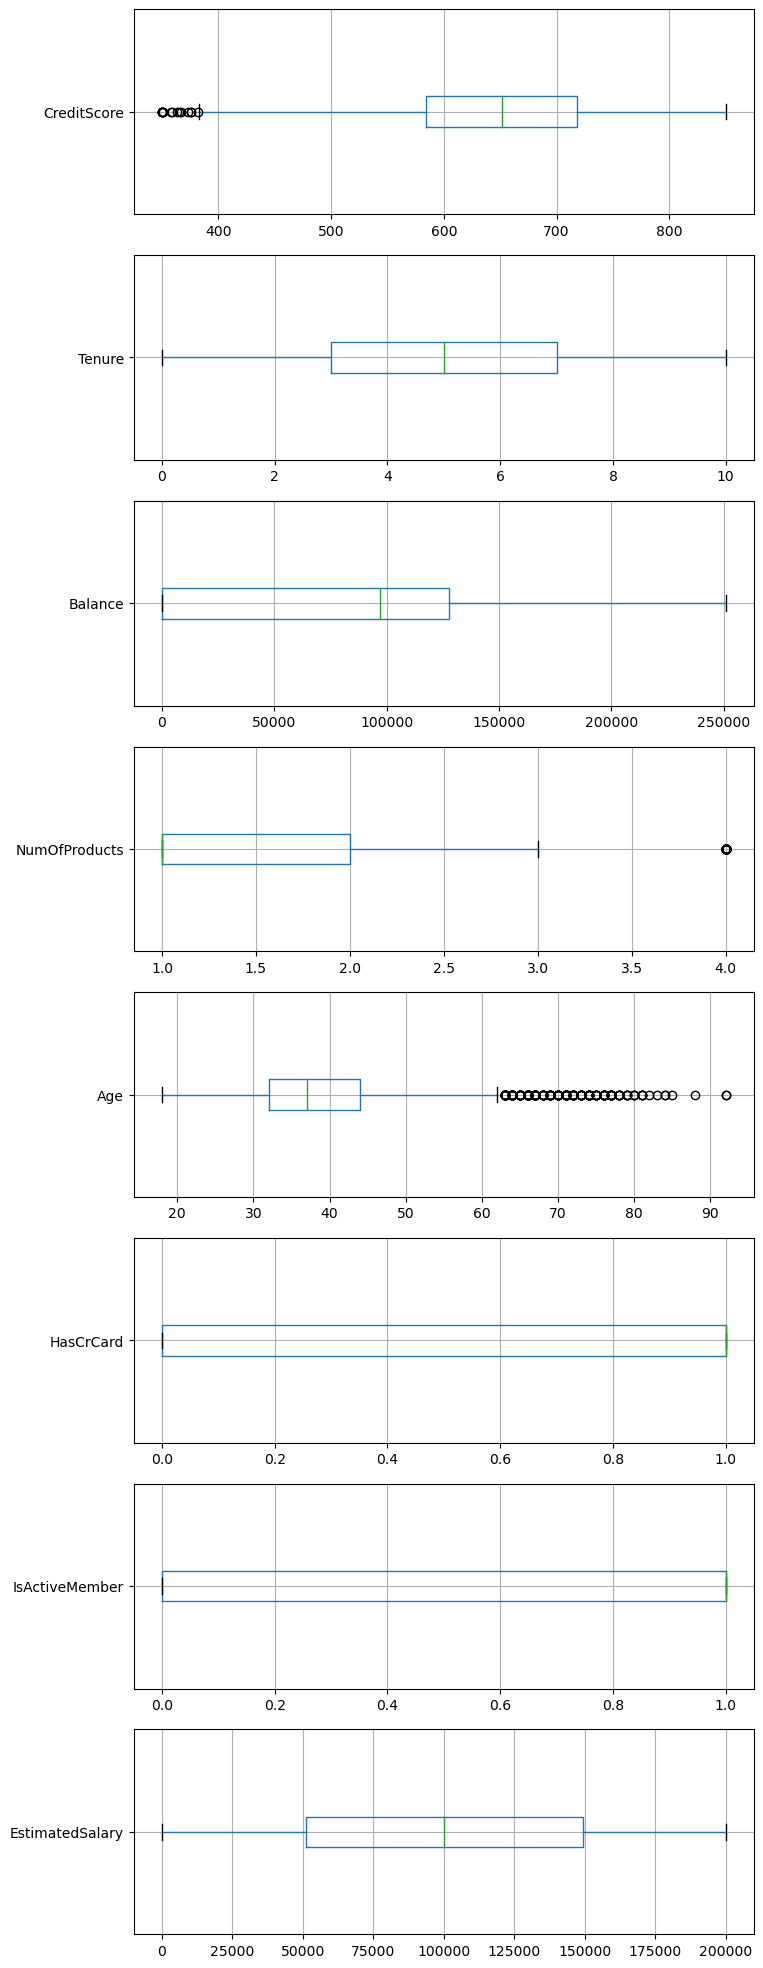

In [16]:
fig, axes = plt.subplots(8, 1, figsize=(8, 25))
for i, c in enumerate(num_features):
    f = df[[c]].boxplot(ax=axes[i], vert=False)

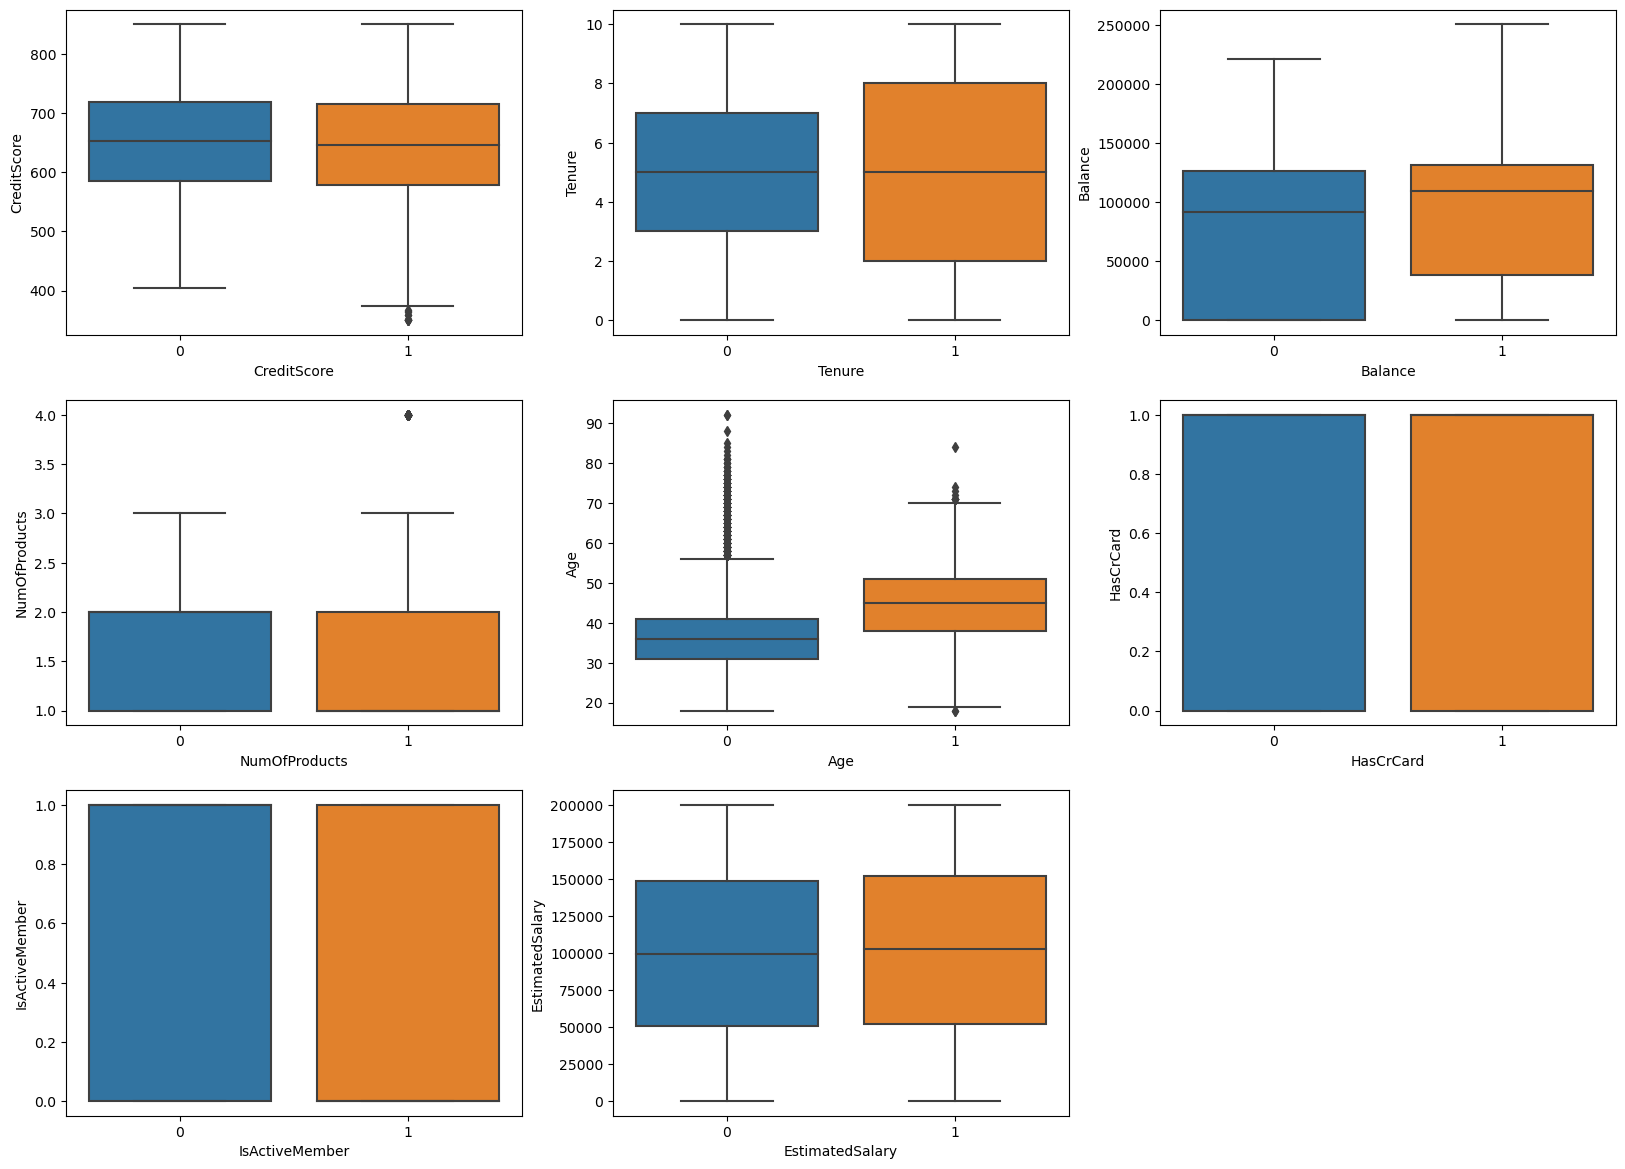

In [17]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in num_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="Exited", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

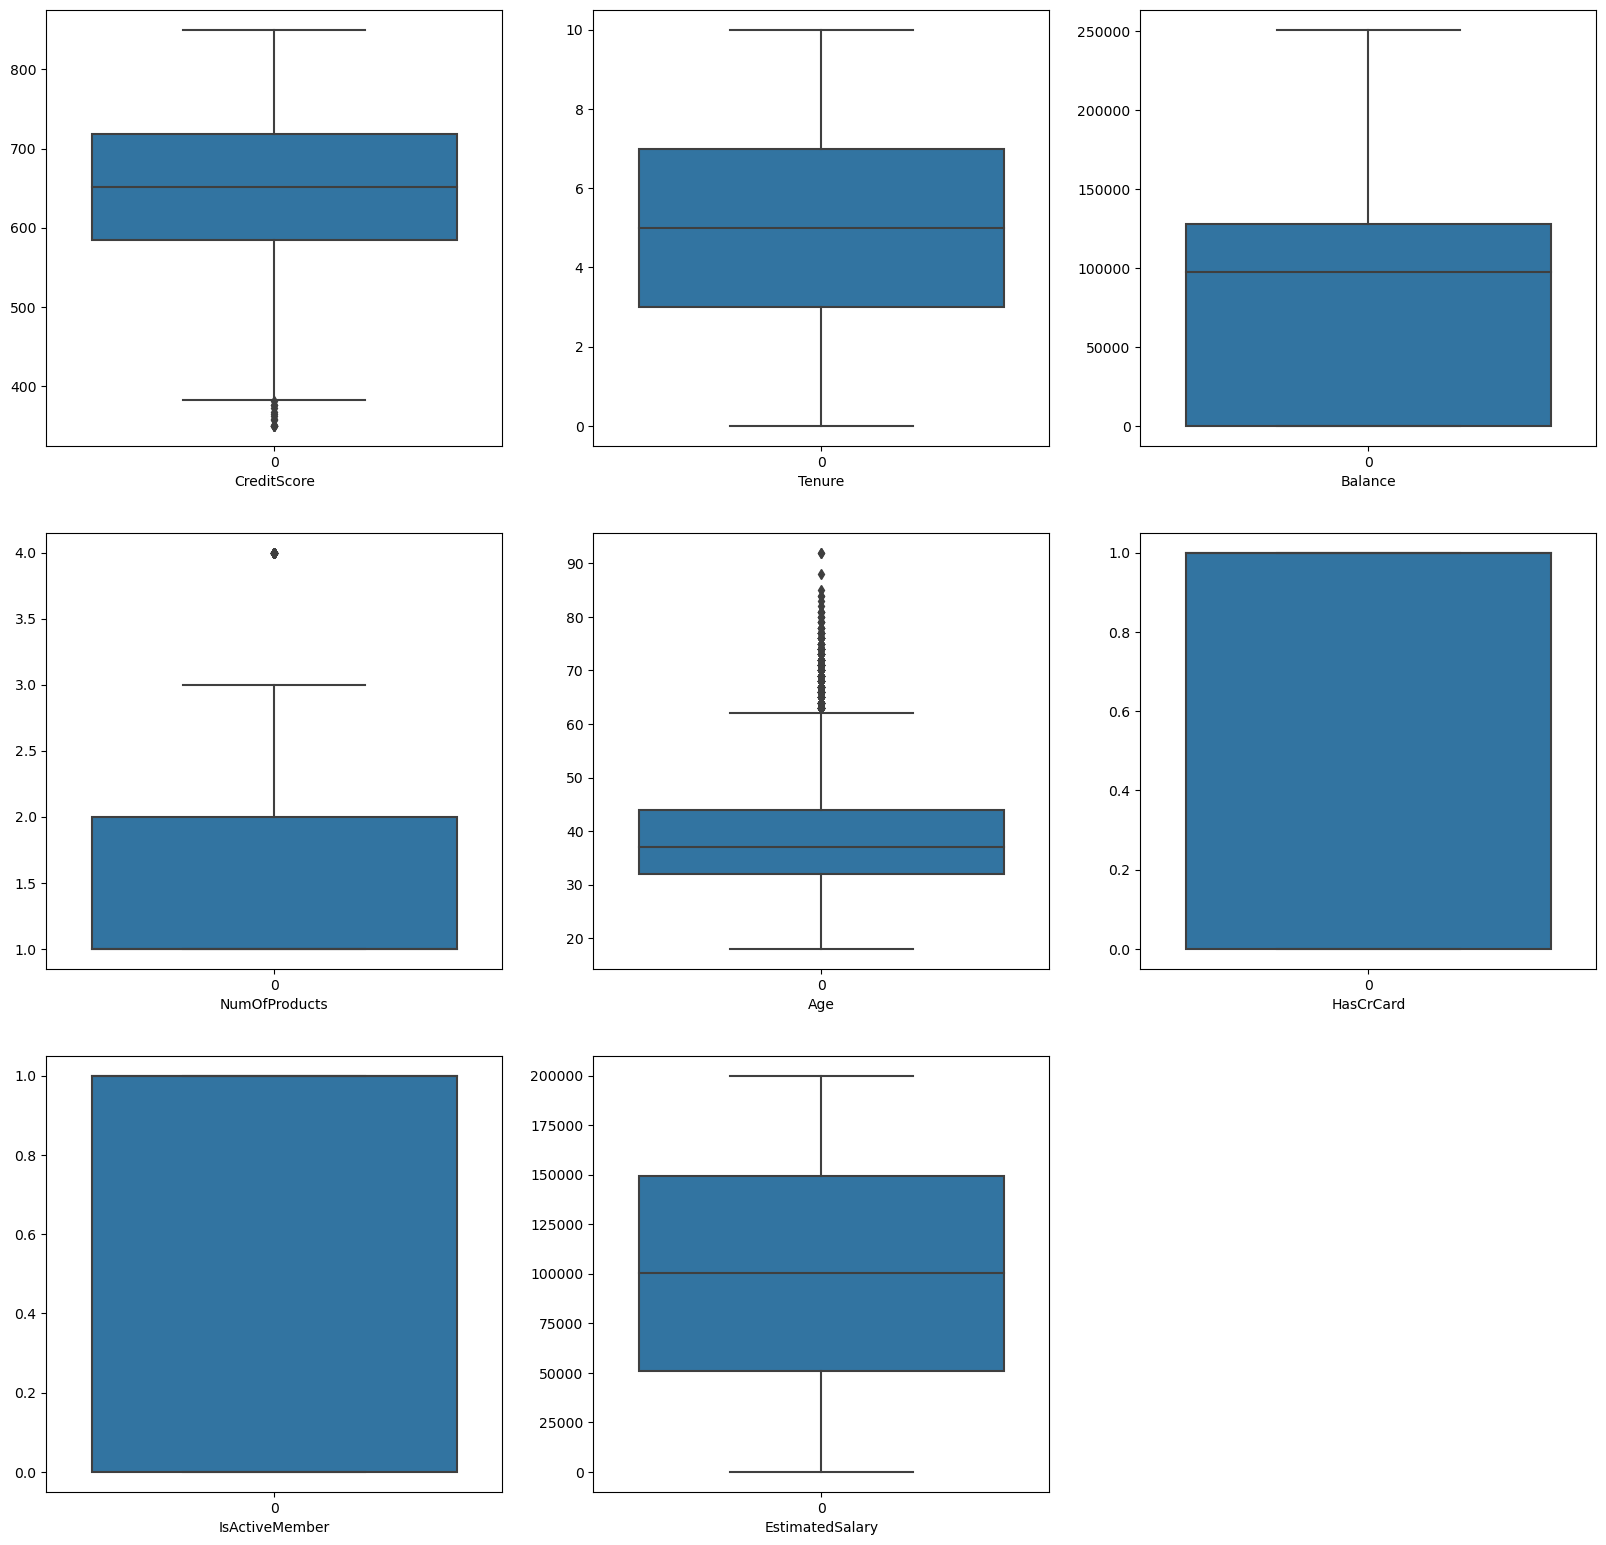

In [18]:
# boxplot on numerical features to find outliers

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for num_features in num_features:
    ax = plt.subplot(9,3,plotnumber)
    sns.boxplot(df[num_features])
    plt.xlabel(num_features)
    plotnumber+=1
plt.show()

In [19]:
df = df.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [20]:
df[(df['CreditScore']) < 375]

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
1193          363     Spain  Female   28       6  146098.43              3   
1405          359    France  Female   44       6  128747.69              1   
1631          350     Spain    Male   54       1  152677.48              1   
1838          350   Germany    Male   39       0  109733.20              2   
1962          358     Spain  Female   52       8  143542.36              3   
2473          351   Germany  Female   57       4  163146.46              1   
2579          365   Germany    Male   30       0  127760.07              1   
8154          367     Spain    Male   42       6   93608.28              1   
8723          350    France    Male   51      10       0.00              1   
8762          350    France  Female   60       3       0.00              1   
9356          373    France    Male   42       7       0.00              1   
9624          350    France  Female   40       0  111098.85              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
1193          1               0        100615.14       1  
1405          1               0        146955.71       1  
1631          1               1        191973.49       1  
1838          0               0        123602.11       1  
1962          1               0        141959.11       1  
2473          1               0        169621.69       1  
2579          1               0         81537.85       1  
8154          1               0        168816.73       1  
8723          1               1        125823.79       1  
8762          0               0        113796.15       1  
9356          1               0         77786.37       1  
9624          1               1        172321.21       1

In [21]:
df.drop(df[(df['CreditScore']) < 375].index, inplace=True)

In [22]:
df[df['NumOfProducts'] ==4]

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
7             376   Germany  Female   29       4  115046.74              4   
70            738   Germany    Male   58       2  133745.44              4   
1254          628    France  Female   46       1   46870.43              4   
1469          819   Germany  Female   49       1  120656.86              4   
1488          596     Spain    Male   30       6  121345.88              4   
1701          792    France    Male   50       9       0.00              4   
1876          640   Germany    Male   39       9  131607.28              4   
2124          704    France    Male   32       7  127785.17              4   
2196          773   Germany    Male   47       2  118079.47              4   
2285          630   Germany    Male   50       3  129370.91              4   
2462          672    France  Female   53       9  169406.33              4   
2499          614    France  Female   37       8   75150.34              4   
2509          655    France  Female   50      10       0.00              4   
2541          611    France  Female   61       3  131583.59              4   
2614          546   Germany  Female   58       3  106458.31              4   
2617          692   Germany    Male   45       6  152296.83              4   
2872          439     Spain    Male   52       3   96196.24              4   
3152          644    France  Female   40       9  137285.26              4   
3365          671     Spain  Female   34       5  130929.02              4   
3841          653    France  Female   60       2  120731.39              4   
4013          720   Germany  Female   57       1  162082.31              4   
4014          641   Germany  Female   51       2  117306.69              4   
4166          850     Spain  Female   45       5  174088.30              4   
4260          587    France    Male   40       2       0.00              4   
4403          602   Germany  Female   43       2  113641.49              4   
4511          634    France  Female   45       2       0.00              4   
4516          497   Germany  Female   32       8  111537.23              4   
4606          797    France  Female   55      10       0.00              4   
4654          578   Germany  Female   31       5  102088.68              4   
4748          537   Germany  Female   37       7  158411.95              4   
4822          745    France  Female   32       2       0.00              4   
5010          575   Germany    Male   49       7  121205.15              4   
5137          698    France  Female   51       6  144237.91              4   
5235          645    France  Female   68       9       0.00              4   
5386          642    France    Male   48       9  118317.27              4   
5700          447    France    Male   41       3       0.00              4   
5904          692   Germany    Male   45       6  142084.04              4   
6150          632   Germany    Male   41       8  127205.32              4   
6172          568   Germany    Male   43       5   87612.64              4   
6279          757     Spain  Female   55       9  117294.12              4   
6750          618    France  Female   42       2       0.00              4   
6875          610    France  Female   57       7   72092.95              4   
7257          747    France  Female   47       5  139914.60              4   
7457          665   Germany  Female   43       2  116322.27              4   
7567          629    France    Male   44       5       0.00              4   
7698          592    France    Male   60       9       0.00              4   
7724          842    France    Male   44       3  141252.18              4   
7729          850    France  Female   35       2  128548.49              4   
8041          698     Spain  Female   50       1       0.00              4   
8590          771    France  Female   41      10  108309.00              4   
8683          697    France 

In [23]:
df.drop(df[df['NumOfProducts'] ==4].index, inplace=True)

In [24]:
import numpy as np
z_scores = (df['Age'] - df['Age'].mean()) / df['Age'].std()
threshold = 3
outlier_mask = np.abs(z_scores) > threshold
outlier_mask

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Age, Length: 9928, dtype: bool

In [25]:
df = df[~outlier_mask]

In [26]:
df[(df['Age']) >68 ]

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
559           850     Spain  Female   70       5       0.00              1   
678           788     Spain  Female   70       1       0.00              2   
807           628    France    Male   69       5       0.00              2   
823           732     Spain  Female   69       9  137453.43              1   
969           649   Germany    Male   70       9  116854.71              2   
1407          721    France    Male   69       2  108424.19              1   
1543          656     Spain    Male   69       6  163975.09              1   
1866          559    France  Female   70       9       0.00              1   
1904          625     Spain  Female   69       1  107569.96              1   
1981          476     Spain  Female   69       1  105303.73              1   
2094          531     Spain    Male   70       1       0.00              2   
2717          775   Germany    Male   70       6  119684.88              2   
2908          494    France    Male   69       9   93320.80              1   
3203          719    France    Male   69       3       0.00              2   
3527          849    France    Male   69       7   71996.09              1   
3646          770    France  Female   70       9  110738.89              1   
3910          620    France  Female   70       3   87926.24              2   
4170          673   Germany  Female   69       3   78833.15              2   
4313          646     Spain    Male   69      10  115462.44              1   
4463          850   Germany  Female   70       1   96947.58              3   
4849          491   Germany    Male   70       6  148745.92              2   
5148          731     Spain    Male   70       3       0.00              2   
5159          762     Spain  Female   69       9  183744.98              1   
5817          613   Germany    Male   69       9   78778.49              1   
6046          593   Germany    Male   69       2  187013.13              2   
7194          799    France    Male   70       8   70416.75              1   
7624          728    France  Female   69       1       0.00              2   
7933          782    France  Female   70       7   97072.42              1   
8304          675    France    Male   69       1       0.00              2   
8394          692    France    Male   69      10  154953.94              1   
8444          792    France  Female   70       3       0.00              2   
8488          592   Germany  Female   70       5   71816.74              2   
8930          724    France  Female   69       5  117866.92              1   
9318          668     Spain  Female   69       9       0.00              1   
9380          627    France    Male   70       1   94416.78              1   
9402          810   Germany    Male   69       3   27288.43              1   
9428          737    France  Female   70       9   87542.89              2   
9506          682    France    Male   69       6       0.00              2   
9734          667   Germany    Male   70       3   77356.92              2   
9747          610   Germany  Female   69       5   86038.21              3   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
559           1               1           705.18       0  
678           1               1         41610.62       0  
807           1               1        181964.60       0  
823           0               1        110932.24       1  
969           0               1        107125.79       0  
1407          1               1        178418.35       0  
1543          1               1         36108.50       0  
1866          1               1        122996.76       0  
1904          1               1        182336.45       0  
1981          0               1        134260.34       0  
2094          0               0         99503.19       0  
2717          1               1         74532.02       0  
2908          1               1         

In [27]:
num_features=['CreditScore', 'Tenure', 'Balance', 'NumOfProducts',
       'Age', 'HasCrCard', 'IsActiveMember','EstimatedSalary']

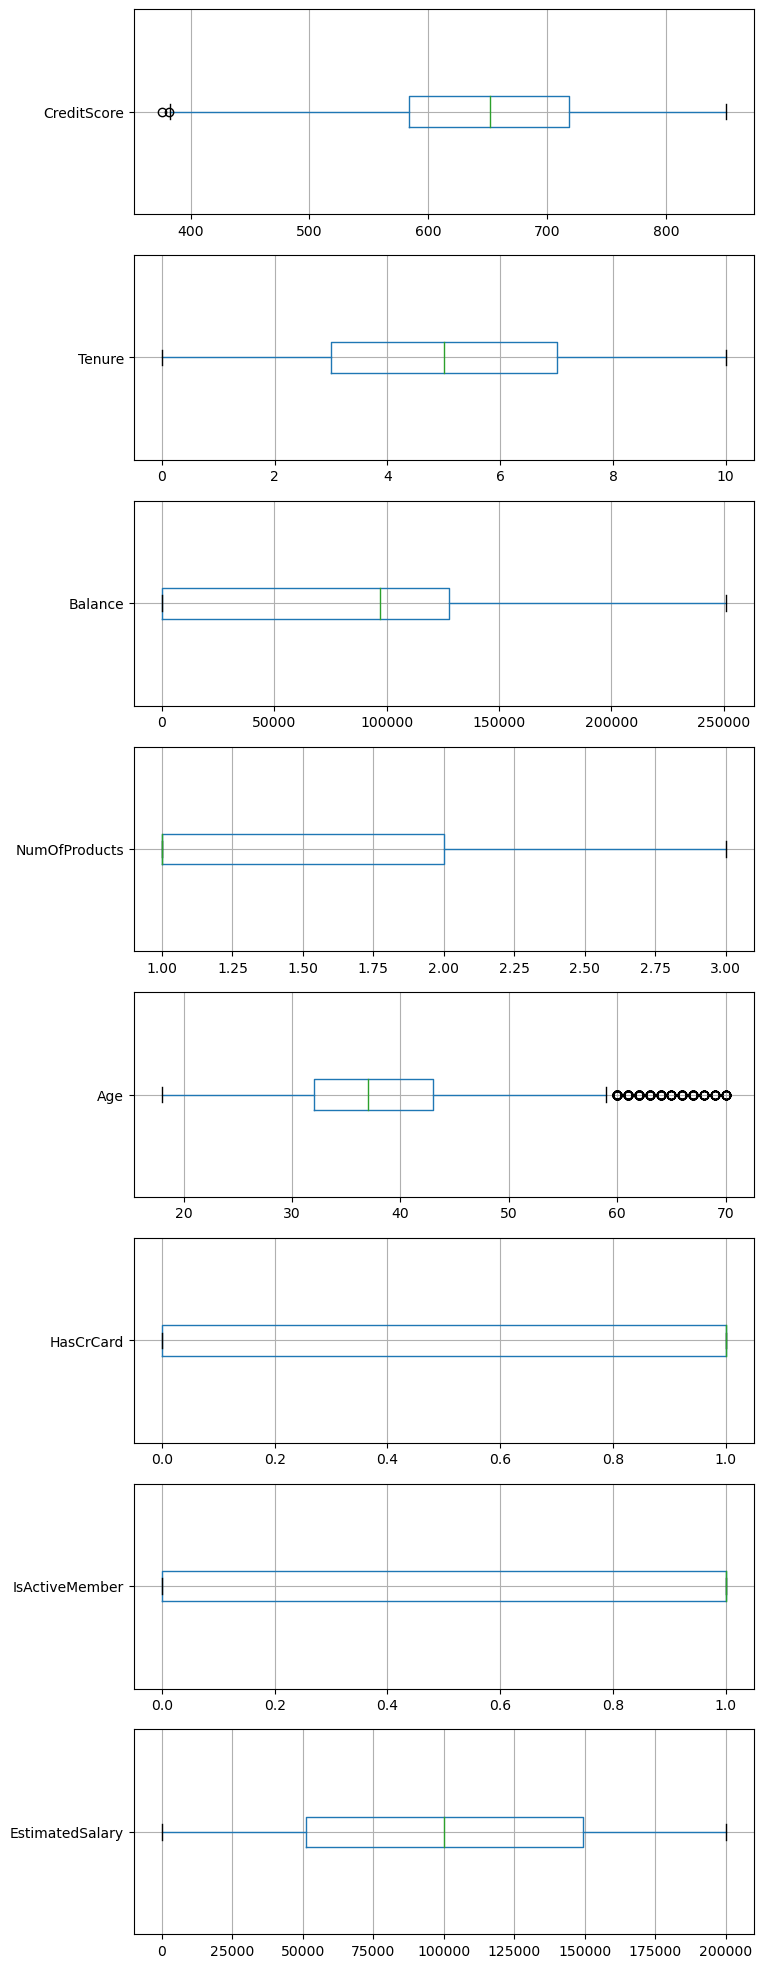

In [28]:
fig, axes = plt.subplots(8, 1, figsize=(8, 25))
for i, c in enumerate(num_features):
    f = df[[c]].boxplot(ax=axes[i], vert=False)

<Axes: >

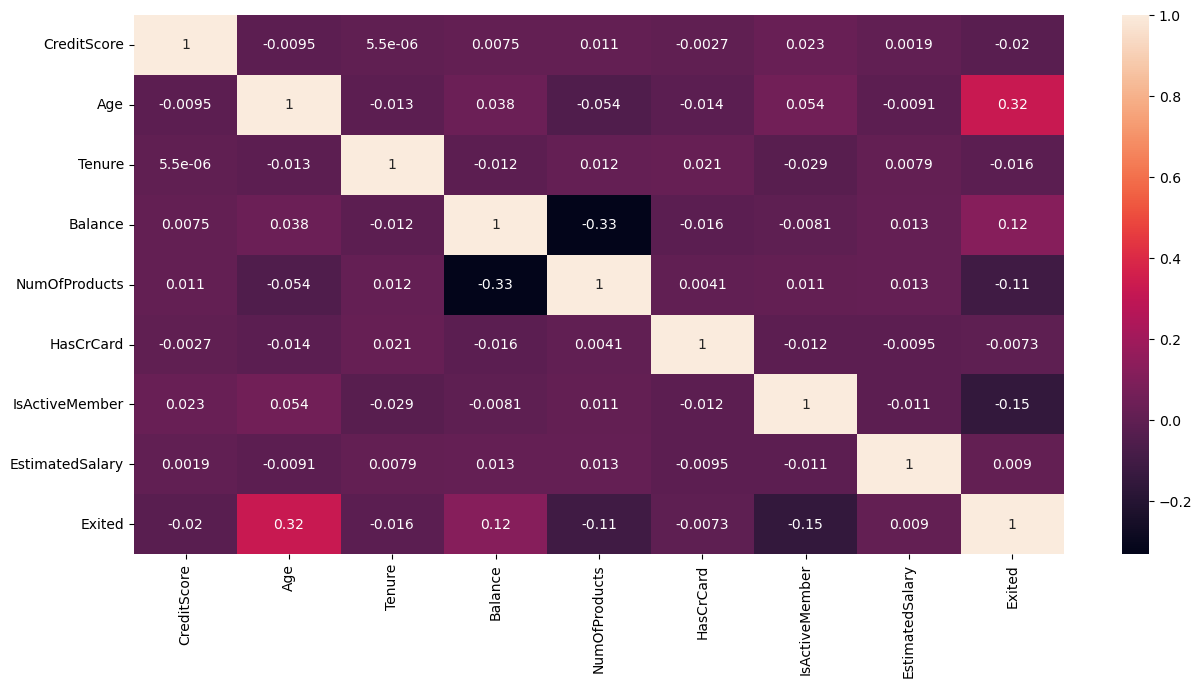

In [29]:
cor_mat=df.corr(numeric_only = True)
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [30]:
# plt.figure(figsize=(20,60), facecolor='white')
# plotnumber =1
# for feature in num_features:
#     ax = plt.subplot(12,3,plotnumber)
#     sns.boxplot(x="Exited", y= df[feature], data=df)
#     plt.xlabel(feature)
#     plotnumber+=1
# plt.show()

In [31]:
df.describe()

CreditScore          Age       Tenure        Balance  NumOfProducts  \
count  9795.000000  9795.000000  9795.000000    9795.000000    9795.000000   
mean    650.702501    38.385605     5.011639   76466.389866       1.515467   
std      96.190258     9.664320     2.890957   62408.892376       0.550716   
min     376.000000    18.000000     0.000000       0.000000       1.000000   
25%     584.000000    32.000000     3.000000       0.000000       1.000000   
50%     652.000000    37.000000     5.000000   97133.920000       1.000000   
75%     718.000000    43.000000     7.000000  127634.770000       2.000000   
max     850.000000    70.000000    10.000000  250898.090000       3.000000   

         HasCrCard  IsActiveMember  EstimatedSalary       Exited  
count  9795.000000      9795.00000      9795.000000  9795.000000  
mean      0.705258         0.51026    100026.435947     0.199490  
std       0.455950         0.49992     57502.739707     0.399637  
min       0.000000         0.00000        11.580000     0.000000  
25%       0.000000         0.00000     50973.585000     0.000000  
50%       1.000000         1.00000    100060.540000     0.000000  
75%       1.000000         1.00000    149382.875000     0.000000  
max       1.000000         1.00000    199992.480000     1.000000

In [32]:
cat_features=['Geography', 'Gender']

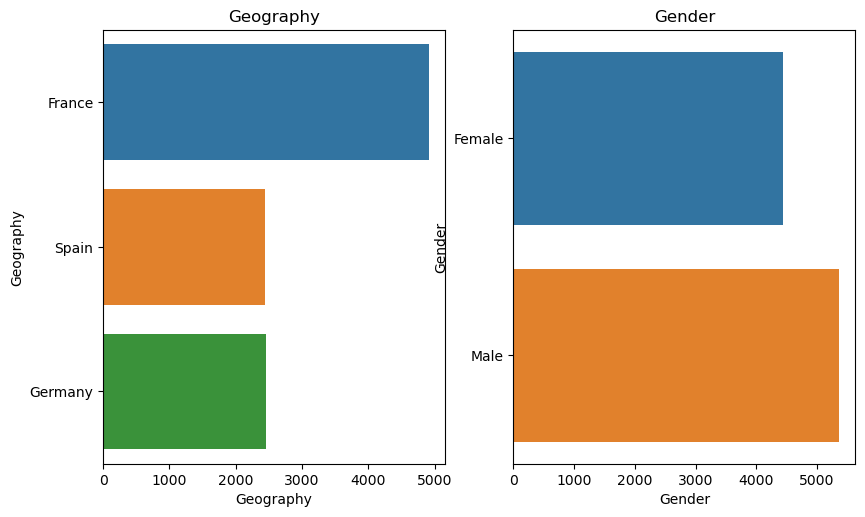

In [33]:
 #check count based on categorical features

plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for cat_features in cat_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=cat_features,data=df)
    plt.xlabel(cat_features)
    plt.title(cat_features)
    plotnumber+=1
plt.show()

In [34]:
# for cat_features in cat_features:
#     sns.catplot(x='Exited', col=cat_features, kind='count', data= df)
# plt.show()

In [35]:
# fig, axes = plt.subplots(1, 2, figsize=(20, 6))
# data = df['marital'].value_counts()
# barplot = data.plot(kind='pie', ax=axes[0], title='MARITAL', autopct="%.2f", fontsize=14, ylabel='')
# countplot = sns.countplot(x='Marital', data=df, ax=axes[1])

In [36]:
#EDA

In [37]:
df.duplicated().sum()


0

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, f1_score, recall_score

def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [39]:
encoded_data = pd.get_dummies(df, drop_first=True, dtype=int)
encoded_data.head(10)


CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0           619   42       2       0.00              1          1   
1           608   41       1   83807.86              1          0   
2           502   42       8  159660.80              3          1   
3           699   39       1       0.00              2          0   
4           850   43       2  125510.82              1          1   
5           645   44       8  113755.78              2          1   
6           822   50       7       0.00              2          1   
8           501   44       4  142051.07              2          0   
9           684   27       2  134603.88              1          1   
10          528   31       6  102016.72              2          0   

    IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                1        101348.88       1                  0   
1                1        112542.58       0                  0   
2                0        113931.57       1                  0   
3                0         93826.63       0                  0   
4                1         79084.10       0                  0   
5                0        149756.71       1                  0   
6                1         10062.80       0                  0   
8                1         74940.50       0                  0   
9                1         71725.73       0                  0   
10               0         80181.12       0                  0   

    Geography_Spain  Gender_Male  
0                 0            0  
1                 1            0  
2                 0            0  
3                 0            0  
4                 1            0  
5                 1            1  
6                 0            1  
8                 0            1  
9                 0            1  
10                0            1

In [40]:
# encoded_data.info()

In [41]:
normal_encoded = encoded_data.copy()

In [42]:
standard_encoded = encoded_data.copy()

# Normalization

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a DataFrame named 'normal_encoded' with your data

numerical_features = ['CreditScore', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Age', 'Tenure']

scaler = MinMaxScaler(feature_range=(0, 1))

normal_encoded[numerical_features] = scaler.fit_transform(normal_encoded[numerical_features])


In [44]:
normal_encoded

CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.512658  0.461538     0.2  0.000000            0.0          1   
1        0.489451  0.442308     0.1  0.334031            0.0          0   
2        0.265823  0.461538     0.8  0.636357            1.0          1   
3        0.681435  0.403846     0.1  0.000000            0.5          0   
4        1.000000  0.480769     0.2  0.500246            0.0          1   
...           ...       ...     ...       ...            ...        ...   
9995     0.833333  0.403846     0.5  0.000000            0.5          1   
9996     0.295359  0.326923     1.0  0.228657            0.0          1   
9997     0.702532  0.346154     0.7  0.000000            0.0          0   
9998     0.835443  0.461538     0.3  0.299226            0.5          1   
9999     0.877637  0.192308     0.4  0.518708            0.0          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1         0.506735       1                  0   
1                  1         0.562709       0                  0   
2                  0         0.569654       1                  0   
3                  0         0.469120       0                  0   
4                  1         0.395400       0                  0   
...              ...              ...     ...                ...   
9995               0         0.481341       0                  0   
9996               1         0.508490       0                  0   
9997               1         0.210390       1                  0   
9998               0         0.464429       1                  1   
9999               0         0.190914       0                  0   

      Geography_Spain  Gender_Male  
0                   0            0  
1                   1            0  
2                   0            0  
3                   0            0  
4                   1            0  
...               ...          ...  
9995                0            1  
9996                0            1  
9997                0            0  
9998                0            1  
9999                0            0  

[9795 rows x 12 columns]

# SMOTE + Models + HyperTuning

# LR WITH SMOTE

In [45]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

X1 = normal_encoded.drop('Exited', axis=1)
y1 = normal_encoded['Exited']

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
}

# Initialize the LR model
model = LogisticRegression(solver='liblinear')

# Initialize a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy')

# Lists to store results
best_scores = []
best_params = []
best_precisions = []
best_recalls = []
best_f1_scores = []

# Loop through each fold
for train_index, test_index in stratified_kfold.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

    # Apply SMOTE to the training data within the fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X1_train_resampled, y1_train_resampled = smote.fit_resample(X1_train, y1_train)

    # Perform hyperparameter tuning using GridSearchCV on the resampled training data
    grid_search.fit(X1_train_resampled, y1_train_resampled)

    # Get the best hyperparameters and score
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

    # Train the model with the best hyperparameters on the full training fold
    best_model = grid_search.best_estimator_
    best_model.fit(X1_train_resampled, y1_train_resampled)

    # Evaluate the model on the test fold
    y1_pred = best_model.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_pred)
    print(f'Accuracy on this fold: {accuracy}')

    # Calculate and store precision, recall, and F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(y1_test, y1_pred, average='weighted')
    best_precisions.append(precision)
    best_recalls.append(recall)
    best_f1_scores.append(f1)

# Display the best hyperparameters, their corresponding scores, and other metrics for each fold
for fold, (params, score, precision, recall, f1) in enumerate(zip(best_params, best_scores, best_precisions, best_recalls, best_f1_scores)):
    print(f'Fold {fold + 1}: Best Params - {params}, Best Score - {score}')
    print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

Accuracy on this fold: 0.7508933129147525
Accuracy on this fold: 0.7269014803471159
Accuracy on this fold: 0.7151607963246555
Accuracy on this fold: 0.7166921898928025
Accuracy on this fold: 0.7294538029606943
Fold 1: Best Params - {'C': 0.1, 'penalty': 'l1'}, Best Score - 0.7240544081148503
Precision: 0.8095880195501376, Recall: 0.7508933129147525, F1 Score: 0.7697267411895549
Fold 2: Best Params - {'C': 1.0, 'penalty': 'l1'}, Best Score - 0.7289970607803938
Precision: 0.8020965763755102, Recall: 0.7269014803471159, F1 Score: 0.7498869412482033
Fold 3: Best Params - {'C': 0.1, 'penalty': 'l1'}, Best Score - 0.7253310869713653
Precision: 0.7969561027287335, Recall: 0.7151607963246555, F1 Score: 0.7398930876129888
Fold 4: Best Params - {'C': 10.0, 'penalty': 'l1'}, Best Score - 0.7317868581473229
Precision: 0.7986262880135481, Recall: 0.7166921898928025, F1 Score: 0.7413290973763461
Fold 5: Best Params - {'C': 1.0, 'penalty': 'l1'}, Best Score - 0.7202648773824122
Precision: 0.811740723

In [46]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(C = 10.0,max_iter = 1000)
logr.fit(X1_train_resampled, y1_train_resampled)
y1_predict_lr = logr.predict(X1_test)
generate_model_report(y1_test, y1_predict_lr)

Accuracy =  0.7294538029606943
Precision =  0.4005681818181818
Recall =  0.7230769230769231
F1 Score =  0.5155393053016454


# KNN WITH SMOTE

In [47]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

X1 = normal_encoded.drop('Exited', axis=1)
y1 = normal_encoded['Exited']

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
}

# Initialize the KNN model
model = KNeighborsClassifier()

# Initialize a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy')

# Lists to store results
best_scores = []
best_params = []
best_precisions = []
best_recalls = []
best_f1_scores = []

# Loop through each fold
for train_index, test_index in stratified_kfold.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

    # Apply SMOTE to the training data within the fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X1_train_resampled, y1_train_resampled = smote.fit_resample(X1_train, y1_train)

    # Perform hyperparameter tuning using GridSearchCV on the resampled training data
    grid_search.fit(X1_train_resampled, y1_train_resampled)

    # Get the best hyperparameters and score
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

    # Train the model with the best hyperparameters on the full training fold
    best_model = grid_search.best_estimator_
    best_model.fit(X1_train_resampled, y1_train_resampled)

    # Evaluate the model on the test fold
    y1_pred = best_model.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_pred)
    print(f'Accuracy on this fold: {accuracy}')

#     # Calculate and store precision, recall, and F1 score
#     precision, recall, f1, _ = precision_recall_fscore_support(y1_test, y1_pred, average='weighted')
#     best_precisions.append(precision)
#     best_recalls.append(recall)
#     best_f1_scores.append(f1)

# Display the best hyperparameters, their corresponding scores, and other metrics for each fold
for fold, (params, score, precision, recall, f1) in enumerate(zip(best_params, best_scores, best_precisions, best_recalls, best_f1_scores)):
    print(f'Fold {fold + 1}: Best Params - {params}, Best Score - {score}')
   # print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

Accuracy on this fold: 0.7529351710056151
Accuracy on this fold: 0.742215416028586
Accuracy on this fold: 0.7457886676875957
Accuracy on this fold: 0.7350689127105666
Accuracy on this fold: 0.731495661051557


In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3, weights='distance')
knn.fit(X1_train_resampled, y1_train_resampled)
y1_predict_knn = knn.predict(X1_test)
generate_model_report(y1_test, y1_predict_knn)

Accuracy =  0.731495661051557
Precision =  0.38996763754045305
Recall =  0.617948717948718
F1 Score =  0.4781746031746032


# DT WITH SMOTE

In [49]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

X1 = normal_encoded.drop('Exited', axis=1)
y1 = normal_encoded['Exited']

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Adjust the depth as needed
    'min_samples_split': [2, 5, 10],  # Adjust the split criterion as needed
}

# Initialize the Decision Tree model
model = DecisionTreeClassifier()

# Initialize a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy')

# Lists to store results
best_scores = []
best_params = []

# Loop through each fold
for train_index, test_index in stratified_kfold.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

    # Apply SMOTE to the training data within the fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X1_train_resampled, y1_train_resampled = smote.fit_resample(X1_train, y1_train)

    # Perform hyperparameter tuning using GridSearchCV on the resampled training data
    grid_search.fit(X1_train_resampled, y1_train_resampled)

    # Get the best hyperparameters and score
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

    # Train the model with the best hyperparameters on the full training fold
    best_model = grid_search.best_estimator_
    best_model.fit(X1_train_resampled, y1_train_resampled)

    # Evaluate the model on the test fold
    y1_pred = best_model.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_pred)
    print(f'Accuracy on this fold: {accuracy}')

# Display the best hyperparameters and their corresponding scores for each fold
for fold, (params, score) in enumerate(zip(best_params, best_scores)):
    print(f'Fold {fold + 1}: Best Params - {params}, Best Score - {score}')


Accuracy on this fold: 0.8014293006636038
Accuracy on this fold: 0.7702909647779479
Accuracy on this fold: 0.7549770290964778
Accuracy on this fold: 0.7493619193466055
Accuracy on this fold: 0.7728432873915263
Fold 1: Best Params - {'max_depth': 20, 'min_samples_split': 5}, Best Score - 0.8293479251586717
Fold 2: Best Params - {'max_depth': None, 'min_samples_split': 2}, Best Score - 0.8282322285191637
Fold 3: Best Params - {'max_depth': None, 'min_samples_split': 2}, Best Score - 0.8328555844378563
Fold 4: Best Params - {'max_depth': 20, 'min_samples_split': 2}, Best Score - 0.8287902515089105
Fold 5: Best Params - {'max_depth': 30, 'min_samples_split': 2}, Best Score - 0.827567551074505


In [50]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth= 30, min_samples_split = 5, random_state = 42)
dt.fit(X1_train_resampled, y1_train_resampled)
y1_predict_dt = dt.predict(X1_test)
generate_model_report(y1_test, y1_predict_dt)

Accuracy =  0.776416539050536
Precision =  0.4495798319327731
Recall =  0.5487179487179488
F1 Score =  0.49422632794457283


# RF WITH SMOTE

In [51]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

X1 = normal_encoded.drop('Exited', axis=1)
y1 = normal_encoded['Exited']

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]

}

# Initialize the model
model = RandomForestClassifier()

# Initialize a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy')

# Lists to store results
best_scores = []
best_params = []
best_precisions = []
best_recalls = []
best_f1_scores = []

# Loop through each fold
for train_index, test_index in stratified_kfold.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

    # Apply SMOTE to the training data within the fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X1_train_resampled, y1_train_resampled = smote.fit_resample(X1_train, y1_train)

    # Perform hyperparameter tuning using GridSearchCV on the resampled training data
    grid_search.fit(X1_train_resampled, y1_train_resampled)

    # Get the best hyperparameters and score
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

    # Train the model with the best hyperparameters on the full training fold
    best_model = grid_search.best_estimator_
    best_model.fit(X1_train_resampled, y1_train_resampled)

    # Evaluate the model on the test fold
    y1_pred = best_model.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_pred)
    print(f'Accuracy on this fold: {accuracy}')

    # Calculate and store precision, recall, and F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(y1_test, y1_pred, average='weighted')
    best_precisions.append(precision)
    best_recalls.append(recall)
    best_f1_scores.append(f1)

# Display the best hyperparameters, their corresponding scores, and other metrics for each fold
for fold, (params, score, precision, recall, f1) in enumerate(zip(best_params, best_scores, best_precisions, best_recalls, best_f1_scores)):
    print(f'Fold {fold + 1}: Best Params - {params}, Best Score - {score}')
    print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

Accuracy on this fold: 0.8489025012761613
Accuracy on this fold: 0.8422664624808576
Accuracy on this fold: 0.8259315977539561
Accuracy on this fold: 0.8208269525267994
Accuracy on this fold: 0.8422664624808576
Fold 1: Best Params - {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}, Best Score - 0.8976559922128942
Precision: 0.8433512139001519, Recall: 0.8489025012761613, F1 Score: 0.8456130409068728
Fold 2: Best Params - {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}, Best Score - 0.8954256151956542
Precision: 0.844279425234271, Recall: 0.8422664624808576, F1 Score: 0.8432278118887764
Fold 3: Best Params - {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}, Best Score - 0.89574335579166
Precision: 0.8309516275516652, Recall: 0.8259315977539561, F1 Score: 0.8282314382745954
Fold 4: Best Params - {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 100}, Best Score - 0.8974174247609007
Precision: 0.8248838514245375, Recall: 0.82082695252679

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=None,min_samples_leaf = 1, random_state=42)
rf.fit(X1_train_resampled, y1_train_resampled)
y1_predict_rf = rf.predict(X1_test)
generate_model_report(y1_test, y1_predict_rf)

Accuracy =  0.8443083205717202
Precision =  0.6081424936386769
Recall =  0.6128205128205129
F1 Score =  0.6104725415070242


# Adaboost WITH SMOTE

In [53]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

X1 = normal_encoded.drop('Exited', axis=1)
y1 = normal_encoded['Exited']

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

# Initialize the AdaBoostClassifier model
base_model = DecisionTreeClassifier(max_depth=1)  # You can customize the base model
model = AdaBoostClassifier(base_model)


# Initialize a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy')

# Lists to store results
best_scores = []
best_params = []
best_precisions = []
best_recalls = []
best_f1_scores = []

# Loop through each fold
for train_index, test_index in stratified_kfold.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

    # Apply SMOTE to the training data within the fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X1_train_resampled, y1_train_resampled = smote.fit_resample(X1_train, y1_train)

    # Perform hyperparameter tuning using GridSearchCV on the resampled training data
    grid_search.fit(X1_train_resampled, y1_train_resampled)

    # Get the best hyperparameters and score
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

    # Train the model with the best hyperparameters on the full training fold
    best_model = grid_search.best_estimator_
    best_model.fit(X1_train_resampled, y1_train_resampled)

    # Evaluate the model on the test fold
    y1_pred = best_model.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_pred)
    print(f'Accuracy on this fold: {accuracy}')

    # Calculate and store precision, recall, and F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(y1_test, y1_pred, average='weighted')
    best_precisions.append(precision)
    best_recalls.append(recall)
    best_f1_scores.append(f1)

# Display the best hyperparameters, their corresponding scores, and other metrics for each fold
for fold, (params, score, precision, recall, f1) in enumerate(zip(best_params, best_scores, best_precisions, best_recalls, best_f1_scores)):
    print(f'Fold {fold + 1}: Best Params - {params}, Best Score - {score}')
    print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

Accuracy on this fold: 0.8351199591628382
Accuracy on this fold: 0.8203164880040837
Accuracy on this fold: 0.8050025523226135
Accuracy on this fold: 0.8162327718223583
Accuracy on this fold: 0.8305257784583971
Fold 1: Best Params - {'learning_rate': 1.0, 'n_estimators': 200}, Best Score - 0.8580421081715386
Precision: 0.8399093417282074, Recall: 0.8351199591628382, F1 Score: 0.8372984004771095
Fold 2: Best Params - {'learning_rate': 1.0, 'n_estimators': 200}, Best Score - 0.8669701901838639
Precision: 0.8305643519644637, Recall: 0.8203164880040837, F1 Score: 0.8246867465622835
Fold 3: Best Params - {'learning_rate': 1.0, 'n_estimators': 200}, Best Score - 0.8648971431928724
Precision: 0.8171501381156194, Recall: 0.8050025523226135, F1 Score: 0.8101983134216408
Fold 4: Best Params - {'learning_rate': 1.0, 'n_estimators': 200}, Best Score - 0.8657738912822206
Precision: 0.8262695424973933, Recall: 0.8162327718223583, F1 Score: 0.8205579367137127
Fold 5: Best Params - {'learning_rate': 1.

In [54]:
accuracies = {"AdaBoost":accuracy_score(y1_test,y1_pred), "KNN":accuracy_score(y1_test,y1_predict_knn), "Decision Tree":accuracy_score(y1_test,y1_predict_dt), "Random Forest":accuracy_score(y1_test,y1_predict_rf), "Logistic Regression":accuracy_score(y1_test,y1_predict_lr)}
print("The best accuracy  score has the model: ", max(accuracies, key=accuracies.get))

precisions = {"AdaBoost":precision_score(y1_test,y1_pred), "KNN":precision_score(y1_test,y1_predict_knn), "Decision Tree":precision_score(y1_test,y1_predict_dt), "Random Forest":precision_score(y1_test,y1_predict_rf), "Logistic Regression":precision_score(y1_test,y1_predict_lr)}
print("The best precision score has the model: ", max(precisions, key=precisions.get))

recalls = {"AdaBoost":recall_score(y1_test,y1_pred),"KNN":recall_score(y1_test,y1_predict_knn), "Decision Tree":recall_score(y1_test,y1_predict_dt), "Random Forest":recall_score(y1_test,y1_predict_rf), "Logistic Regression":recall_score(y1_test,y1_predict_lr)}
print("The best recall score has the model: ", max(recalls, key=recalls.get))

f1_scores = {"AdaBoost":f1_score(y1_test,y1_pred), "KNN":f1_score(y1_test,y1_predict_knn), "Decision Tree":f1_score(y1_test,y1_predict_dt), "Random Forest":f1_score(y1_test,y1_predict_rf), "Logistic Regression":f1_score(y1_test,y1_predict_lr)}
print("The best f1_score     has the model: ", max(recalls, key=recalls.get))

The best accuracy  score has the model:  Random Forest
The best precision score has the model:  Random Forest
The best recall score has the model:  Logistic Regression
The best f1_score     has the model:  Logistic Regression


In [55]:
models_keys             = list(accuracies.keys())
accuracy_models_values  = list(accuracies.values())
#precision_models_keys   = list(precisions.keys())
precision_models_values = list(precisions.values())
recall_models_values    = list(recalls.values())
f1_score_models_values  = list(recalls.values())

df_models               = pd.DataFrame({"Model":models_keys,
                                       "Accuracy":accuracy_models_values,
                                       "Precision": precision_models_values,
                                       "Recall": recall_models_values,
                                       "F1_Score": f1_score_models_values})
print(df_models)

                 Model  Accuracy  Precision    Recall  F1_Score
0                  KNN  0.731496   0.389968  0.617949  0.617949
1        Decision Tree  0.776417   0.449580  0.548718  0.548718
2        Random Forest  0.844308   0.608142  0.612821  0.612821
3  Logistic Regression  0.729454   0.400568  0.723077  0.723077


# Confusion Matrix of Best Model with Smote

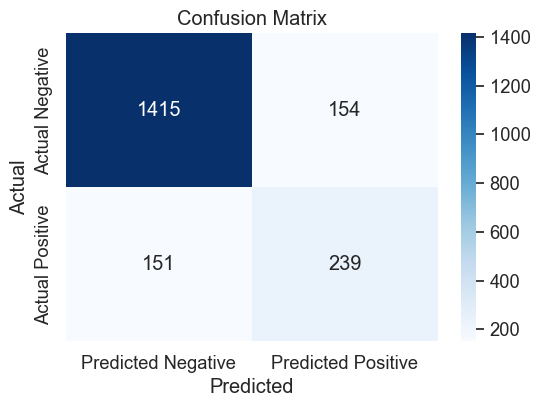

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_true is the true labels and y_pred is the predicted labels
conf_matrix = confusion_matrix(y1_test, y1_predict_rf)

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust the font scale for labels

sns.heatmap(
    conf_matrix,
    annot=True,  # Display values in the cells
    fmt="d",     # Integer formatting for values
    cmap="Blues",  # Color map
    xticklabels=["Predicted Negative", "Predicted Positive"],
    yticklabels=["Actual Negative", "Actual Positive"],
    cbar=True,
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# ROC-AUC CURVE of Best Model with Smote

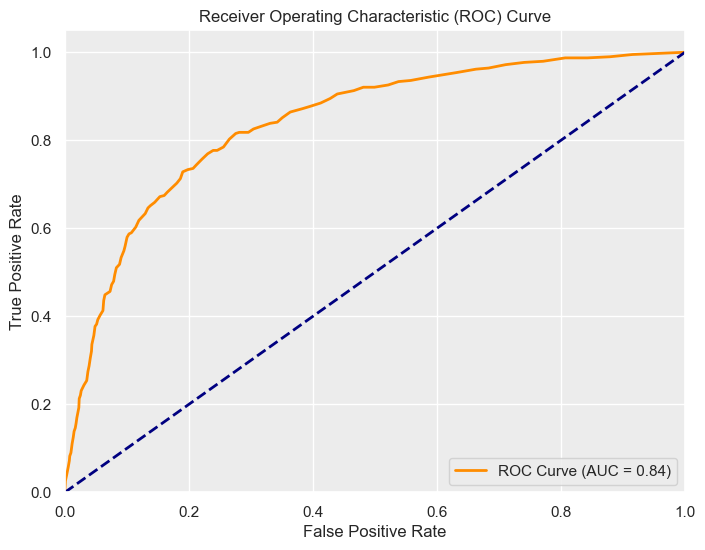

In [109]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y1_prob_rf = rf.predict_proba(X1_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y1_test, y1_prob_rf)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Smote Ends

# Adasyn + Models + Stratified Hypertuning

# LR WITH Adasyn

In [57]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN


X1 = normal_encoded.drop('Exited', axis=1)
y1 = normal_encoded['Exited']

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
}

# Initialize the LR model
model = LogisticRegression(solver='liblinear')

# Initialize a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy')

# Lists to store results
best_scores = []
best_params = []
best_precisions = []
best_recalls = []
best_f1_scores = []

# Loop through each fold
for train_index, test_index in stratified_kfold.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

    # Create an ADASYN resampler
    adasyn = ADASYN(sampling_strategy='auto', random_state=42)

    # Apply ADASYN to balance the dataset
    X1_adasyn, y1_adasyn = adasyn.fit_resample(X1_train, y1_train)

    
    # Perform hyperparameter tuning using GridSearchCV on the resampled training data
    grid_search.fit(X1_adasyn, y1_adasyn)

    # Get the best hyperparameters and score
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

    # Train the model with the best hyperparameters on the full training fold
    best_model = grid_search.best_estimator_
    best_model.fit(X1_adasyn, y1_adasyn)

    # Evaluate the model on the test fold
    y1_predict_lr = best_model.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_predict_lr)
    print(f'Accuracy on this fold: {accuracy}')

    # Calculate and store precision, recall, and F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(y1_test, y1_predict_lr, average='weighted')
    best_precisions.append(precision)
    best_recalls.append(recall)
    best_f1_scores.append(f1)

# Display the best hyperparameters, their corresponding scores, and other metrics for each fold
for fold, (params, score, precision, recall, f1) in enumerate(zip(best_params, best_scores, best_precisions, best_recalls, best_f1_scores)):
    print(f'Fold {fold + 1}: Best Params - {params}, Best Score - {score}')
    print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

Accuracy on this fold: 0.7299642674834099
Accuracy on this fold: 0.700357325165901
Accuracy on this fold: 0.6952526799387443
Accuracy on this fold: 0.6998468606431854
Accuracy on this fold: 0.7105666156202144
Fold 1: Best Params - {'C': 0.1, 'penalty': 'l1'}, Best Score - 0.6970083039828601
Precision: 0.8123464408572679, Recall: 0.7299642674834099, F1 Score: 0.7536577741694056
Fold 2: Best Params - {'C': 1.0, 'penalty': 'l1'}, Best Score - 0.7019561471586588
Precision: 0.8010897874044943, Recall: 0.700357325165901, F1 Score: 0.7283543423557611
Fold 3: Best Params - {'C': 10.0, 'penalty': 'l1'}, Best Score - 0.7025485040529664
Precision: 0.7982785367017662, Recall: 0.6952526799387443, F1 Score: 0.7238906286229838
Fold 4: Best Params - {'C': 10.0, 'penalty': 'l2'}, Best Score - 0.7054406666444537
Precision: 0.7984908289982832, Recall: 0.6998468606431854, F1 Score: 0.7276940829400135
Fold 5: Best Params - {'C': 1.0, 'penalty': 'l2'}, Best Score - 0.7021894813723454
Precision: 0.8099367010

In [58]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(C =10.0, max_iter = 1000)
logr.fit(X1_adasyn, y1_adasyn)
y1_predict_lr = logr.predict(X1_test)
generate_model_report(y1_test, y1_predict_lr)

Accuracy =  0.709545686574783
Precision =  0.38145695364238413
Recall =  0.7384615384615385
F1 Score =  0.503056768558952


# KNN WITH Adasyn

In [59]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

X1 = normal_encoded.drop('Exited', axis=1)
y1 = normal_encoded['Exited']

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
}

# Initialize the KNN model
model = KNeighborsClassifier()

# Initialize a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy')

# Lists to store results
best_scores = []
best_params = []
best_precisions = []
best_recalls = []
best_f1_scores = []

# Loop through each fold
for train_index, test_index in stratified_kfold.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

   # Create an ADASYN resampler
    adasyn = ADASYN(sampling_strategy='auto', random_state=42)

    # Apply ADASYN to balance the dataset
    X1_adasyn, y1_adasyn = adasyn.fit_resample(X1_train, y1_train)


    # Perform hyperparameter tuning using GridSearchCV on the resampled training data
    grid_search.fit(X1_adasyn, y1_adasyn)

    # Get the best hyperparameters and score
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

    # Train the model with the best hyperparameters on the full training fold
    best_model = grid_search.best_estimator_
    best_model.fit(X1_adasyn, y1_adasyn)

    # Evaluate the model on the test fold
    y1_predict_knn = best_model.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_predict_knn)
    print(f'Accuracy on this fold: {accuracy}')

    # Calculate and store precision, recall, and F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(y1_test, y1_predict_knn, average='weighted')
    best_precisions.append(precision)
    best_recalls.append(recall)
    best_f1_scores.append(f1)

# Display the best hyperparameters, their corresponding scores, and other metrics for each fold
for fold, (params, score, precision, recall, f1) in enumerate(zip(best_params, best_scores, best_precisions, best_recalls, best_f1_scores)):
    print(f'Fold {fold + 1}: Best Params - {params}, Best Score - {score}')
    print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

Accuracy on this fold: 0.742215416028586
Accuracy on this fold: 0.7355793772332823
Accuracy on this fold: 0.7248596222562532
Accuracy on this fold: 0.7223072996426748
Accuracy on this fold: 0.7228177641653905
Fold 1: Best Params - {'n_neighbors': 3, 'weights': 'distance'}, Best Score - 0.8608517480725191
Precision: 0.7951252883470896, Recall: 0.742215416028586, F1 Score: 0.760415009341032
Fold 2: Best Params - {'n_neighbors': 3, 'weights': 'distance'}, Best Score - 0.8592917068428934
Precision: 0.7958011206983562, Recall: 0.7355793772332823, F1 Score: 0.7555705982298964
Fold 3: Best Params - {'n_neighbors': 3, 'weights': 'distance'}, Best Score - 0.8639420955868046
Precision: 0.7853409155389797, Recall: 0.7248596222562532, F1 Score: 0.7455041243287874
Fold 4: Best Params - {'n_neighbors': 3, 'weights': 'distance'}, Best Score - 0.865269467728449
Precision: 0.7795561490874353, Recall: 0.7223072996426748, F1 Score: 0.7424305230847871
Fold 5: Best Params - {'n_neighbors': 3, 'weights': 'd

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, weights= 'distance')
knn.fit(X1_adasyn, y1_adasyn)
y1_predict_knn = knn.predict(X1_test)
generate_model_report(y1_test, y1_predict_knn)

Accuracy =  0.7228177641653905
Precision =  0.3810264385692068
Recall =  0.6282051282051282
F1 Score =  0.4743465634075508


# DT WITH Adasyn

In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

X1 = normal_encoded.drop('Exited', axis=1)
y1 = normal_encoded['Exited']

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Adjust the depth as needed
    'min_samples_split': [2, 5, 10],  # Adjust the split criterion as needed
}

# Initialize the Decision Tree model
model = DecisionTreeClassifier()

# Initialize a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy')

# Lists to store results
best_scores = []
best_params = []

# Loop through each fold
for train_index, test_index in stratified_kfold.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

   # Create an ADASYN resampler
    adasyn = ADASYN(sampling_strategy='auto', random_state=42)

    # Apply ADASYN to balance the dataset
    X1_adasyn, y1_adasyn = adasyn.fit_resample(X1_train, y1_train)


    # Perform hyperparameter tuning using GridSearchCV on the resampled training data
    grid_search.fit(X1_adasyn, y1_adasyn)

    # Get the best hyperparameters and score
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

    # Train the model with the best hyperparameters on the full training fold
    best_model = grid_search.best_estimator_
    best_model.fit(X1_adasyn, y1_adasyn)

    # Evaluate the model on the test fold
    y1_predict_dt = best_model.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_predict_dt)
    print(f'Accuracy on this fold: {accuracy}')

# Display the best hyperparameters and their corresponding scores for each fold
for fold, (params, score) in enumerate(zip(best_params, best_scores)):
    print(f'Fold {fold + 1}: Best Params - {params}, Best Score - {score}')


Accuracy on this fold: 0.7912200102092904
Accuracy on this fold: 0.7600816743236345
Accuracy on this fold: 0.7677386421643696
Accuracy on this fold: 0.7667177131189382
Accuracy on this fold: 0.7901990811638591
Fold 1: Best Params - {'max_depth': 20, 'min_samples_split': 2}, Best Score - 0.8324363540430022
Fold 2: Best Params - {'max_depth': 20, 'min_samples_split': 2}, Best Score - 0.8286480562545566
Fold 3: Best Params - {'max_depth': 20, 'min_samples_split': 5}, Best Score - 0.8462626309800129
Fold 4: Best Params - {'max_depth': 20, 'min_samples_split': 2}, Best Score - 0.8322855451947685
Fold 5: Best Params - {'max_depth': 30, 'min_samples_split': 10}, Best Score - 0.8351059355383036


In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 20, min_samples_split = 5, random_state = 42)
dt.fit(X1_adasyn, y1_adasyn)
y1_predict_dt = dt.predict(X1_test)
generate_model_report(y1_test, y1_predict_dt)

Accuracy =  0.7784583971413986
Precision =  0.4523809523809524
Recall =  0.5358974358974359
F1 Score =  0.49061032863849763


# RF WITH Adasyn

In [63]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

X1 = normal_encoded.drop('Exited', axis=1)
y1 = normal_encoded['Exited']

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]

}

# Initialize the model
model = RandomForestClassifier()

# Initialize a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy')

# Lists to store results
best_scores = []
best_params = []
best_precisions = []
best_recalls = []
best_f1_scores = []

# Loop through each fold
for train_index, test_index in stratified_kfold.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

    #Create an ADASYN resampler
    adasyn = ADASYN(sampling_strategy='auto', random_state=42)

    # Apply ADASYN to balance the dataset
    X1_adasyn, y1_adasyn = adasyn.fit_resample(X1_train, y1_train)


    # Perform hyperparameter tuning using GridSearchCV on the resampled training data
    grid_search.fit(X1_adasyn, y1_adasyn)

    # Get the best hyperparameters and score
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

    # Train the model with the best hyperparameters on the full training fold
    best_model = grid_search.best_estimator_
    best_model.fit(X1_adasyn, y1_adasyn)

    # Evaluate the model on the test fold
    y1_predict_ada = best_model.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_predict_ada)
    print(f'Accuracy on this fold: {accuracy}')

    # Calculate and store precision, recall, and F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(y1_test, y1_predict_ada, average='weighted')
    best_precisions.append(precision)
    best_recalls.append(recall)
    best_f1_scores.append(f1)

# Display the best hyperparameters, their corresponding scores, and other metrics for each fold
for fold, (params, score, precision, recall, f1) in enumerate(zip(best_params, best_scores, best_precisions, best_recalls, best_f1_scores)):
    print(f'Fold {fold + 1}: Best Params - {params}, Best Score - {score}')
    print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

Accuracy on this fold: 0.8453292496171516
Accuracy on this fold: 0.8310362429811128
Accuracy on this fold: 0.8249106687085248
Accuracy on this fold: 0.8254211332312404
Accuracy on this fold: 0.8315467075038285
Fold 1: Best Params - {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 100}, Best Score - 0.8915630117925142
Precision: 0.8454779952148912, Recall: 0.8453292496171516, F1 Score: 0.845403349275746
Fold 2: Best Params - {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}, Best Score - 0.8959538737721753
Precision: 0.8369863276333923, Recall: 0.8310362429811128, F1 Score: 0.8337018976295895
Fold 3: Best Params - {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}, Best Score - 0.8989815822370009
Precision: 0.8328843495172576, Recall: 0.8249106687085248, F1 Score: 0.8283997742781086
Fold 4: Best Params - {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 100}, Best Score - 0.8988924271055959
Precision: 0.8328203758116456, Recall: 0.82542113323124

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=1, random_state =42)
rf.fit(X1_adasyn, y1_adasyn)
y1_predict_rf = rf.predict(X1_test)
generate_model_report(y1_test, y1_predict_rf)

Accuracy =  0.8203164880040837
Precision =  0.5404255319148936
Recall =  0.6512820512820513
F1 Score =  0.5906976744186045


In [65]:
accuracies = {"AdaBoost":accuracy_score(y1_test,y1_pred), "KNN":accuracy_score(y1_test,y1_predict_knn), "Decision Tree":accuracy_score(y1_test,y1_predict_dt), "Random Forest":accuracy_score(y1_test,y1_predict_rf), "Logistic Regression":accuracy_score(y1_test,y1_predict_lr)}
print("The best accuracy  score has the model: ", max(accuracies, key=accuracies.get))

precisions = {"AdaBoost":precision_score(y1_test,y1_pred), "KNN":precision_score(y1_test,y1_predict_knn), "Decision Tree":precision_score(y1_test,y1_predict_dt), "Random Forest":precision_score(y1_test,y1_predict_rf), "Logistic Regression":precision_score(y1_test,y1_predict_lr)}
print("The best precision score has the model: ", max(precisions, key=precisions.get))

recalls = {"AdaBoost":recall_score(y1_test,y1_pred),"KNN":recall_score(y1_test,y1_predict_knn), "Decision Tree":recall_score(y1_test,y1_predict_dt), "Random Forest":recall_score(y1_test,y1_predict_rf), "Logistic Regression":recall_score(y1_test,y1_predict_lr)}
print("The best recall score has the model: ", max(recalls, key=recalls.get))

f1_scores = {"AdaBoost":f1_score(y1_test,y1_pred), "KNN":f1_score(y1_test,y1_predict_knn), "Decision Tree":f1_score(y1_test,y1_predict_dt), "Random Forest":f1_score(y1_test,y1_predict_rf), "Logistic Regression":f1_score(y1_test,y1_predict_lr)}
print("The best f1_score     has the model: ", max(recalls, key=recalls.get))

The best accuracy  score has the model:  Random Forest
The best precision score has the model:  Random Forest
The best recall score has the model:  Logistic Regression
The best f1_score     has the model:  Logistic Regression


In [66]:
models_keys             = list(accuracies.keys())
accuracy_models_values  = list(accuracies.values())
#precision_models_keys   = list(precisions.keys())
precision_models_values = list(precisions.values())
recall_models_values    = list(recalls.values())
f1_score_models_values  = list(recalls.values())

df_models               = pd.DataFrame({"Model":models_keys,
                                       "Accuracy":accuracy_models_values,
                                       "Precision": precision_models_values,
                                       "Recall": recall_models_values,
                                       "F1_Score": f1_score_models_values})
print(df_models)

                 Model  Accuracy  Precision    Recall  F1_Score
0                  KNN  0.722818   0.381026  0.628205  0.628205
1        Decision Tree  0.778458   0.452381  0.535897  0.535897
2        Random Forest  0.836141   0.580046  0.641026  0.641026
3  Logistic Regression  0.709546   0.381457  0.738462  0.738462


# Confusion Matrix of Best Model with Adasyn

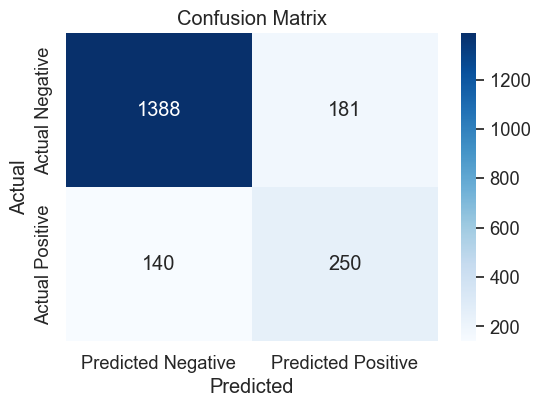

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_true is the true labels and y_pred is the predicted labels
conf_matrix = confusion_matrix(y1_test, y1_predict_rf)

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust the font scale for labels

sns.heatmap(
    conf_matrix,
    annot=True,  # Display values in the cells
    fmt="d",     # Integer formatting for values
    cmap="Blues",  # Color map
    xticklabels=["Predicted Negative", "Predicted Positive"],
    yticklabels=["Actual Negative", "Actual Positive"],
    cbar=True,
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# ROC-AUC Curve of Best Model with Adasyn

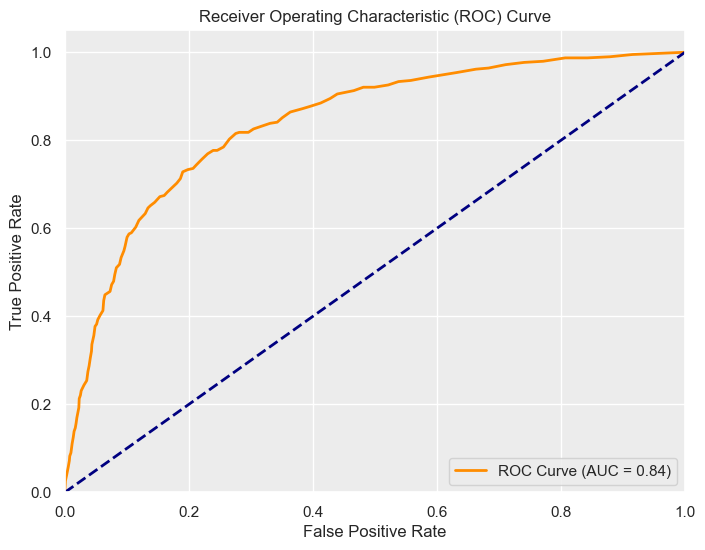

In [112]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y1_prob_rf = rf.predict_proba(X1_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y1_test, y1_prob_rf)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Applying Explainable Ai to our Model with Normalization

# Shap & Lime is applied

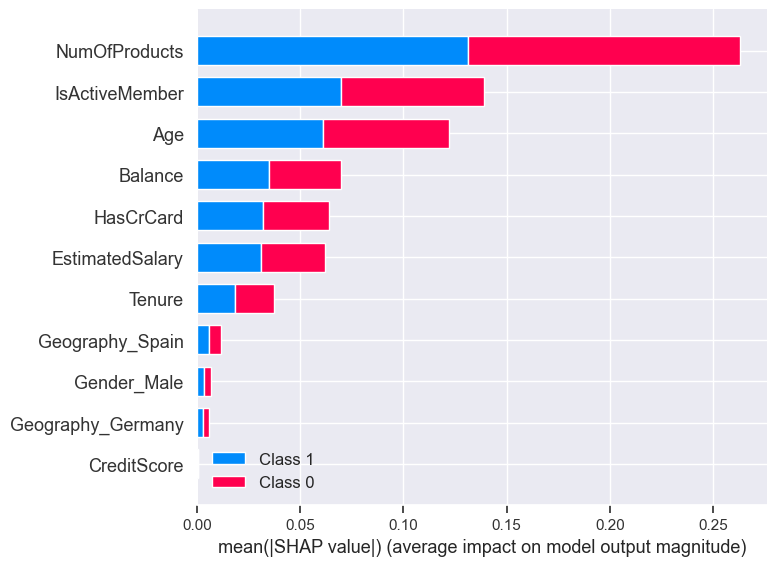

In [68]:
import shap

# Create a SHAP explainer for the trained model
explainer = shap.Explainer(rf)

# Calculate SHAP values for a specific instance (e.g., the first instance in your test data)
shap_values = explainer.shap_values(X1_test.iloc[0, :].values.reshape(1, -1))

# Visualize the SHAP values for the instance
shap.summary_plot(shap_values, X1_test)


In [69]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X1_test.values, training_labels=y1_adasyn, mode="classification")

explanation = explainer.explain_instance(X1_test.values[0], rf.predict_proba)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [70]:
explanation.show_in_notebook()

In [71]:
 explanation.as_list()

[('4 <= 0.00', 0.1788238700049065),
 ('0.37 < 1 <= 0.50', 0.10997634666921181),
 ('0.00 < 6 <= 1.00', -0.10614228521107878),
 ('3 <= 0.00', -0.08191141053631444),
 ('10 <= 0.00', 0.060366298762926276),
 ('0.45 < 0 <= 0.58', 0.023242489850904834),
 ('0.00 < 5 <= 1.00', 0.007759122274943311),
 ('9 <= 0.00', -0.0012685493988600215),
 ('2 <= 0.20', -0.0011135348108906409),
 ('0.25 < 7 <= 0.51', -0.0009899697551479705)]

# Evaluation Graphs of our Model

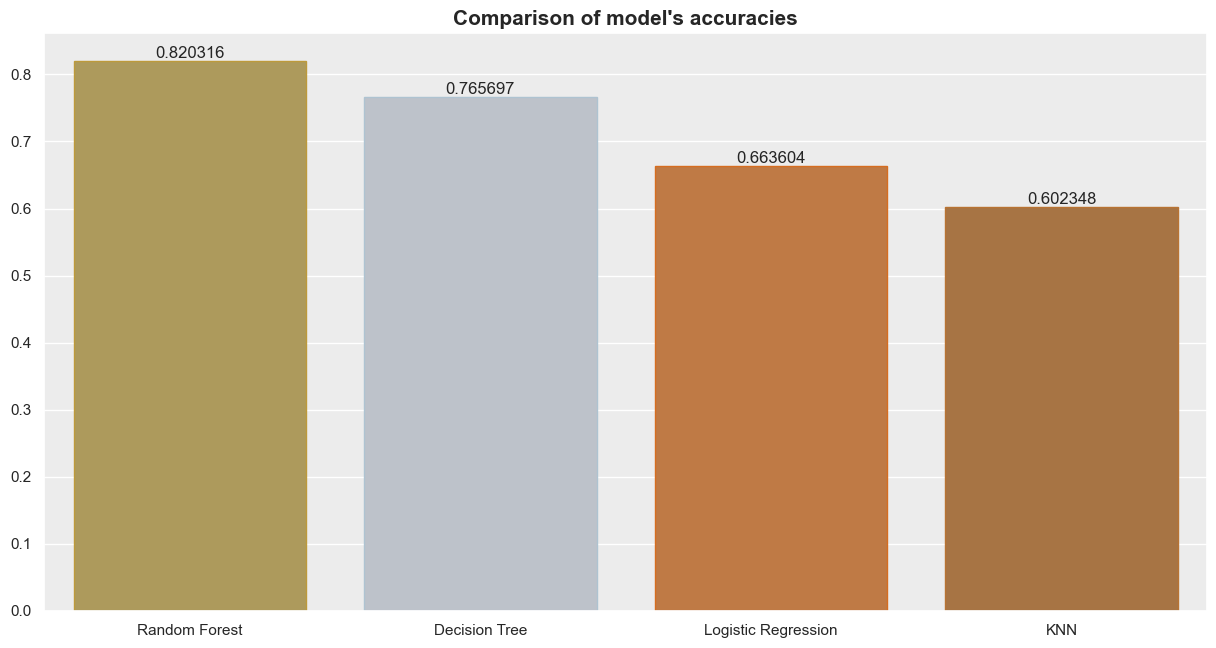

In [116]:
olympic_medals_palette = ['#BBA14F','#BBC2CC', '#D37731', '#B87333', '#B87333']
olympic_medals_edge_colors = ['#BD9A3B','#AEC3D1', '#D66D20', '#B87333', '#B87333']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot

plt.figure(figsize = (15,7.5))
ax = sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()), palette = olympic_medals_palette,  edgecolor = olympic_medals_edge_colors, order=df_models.sort_values('Accuracy', ascending=False).Model)
plt.title(label = "Comparison of model's accuracies", fontsize = 15, fontweight = 'bold', ha = 'center')
ax.bar_label(ax.containers[0], label_type = 'edge', fontsize = 12)

plt.show()

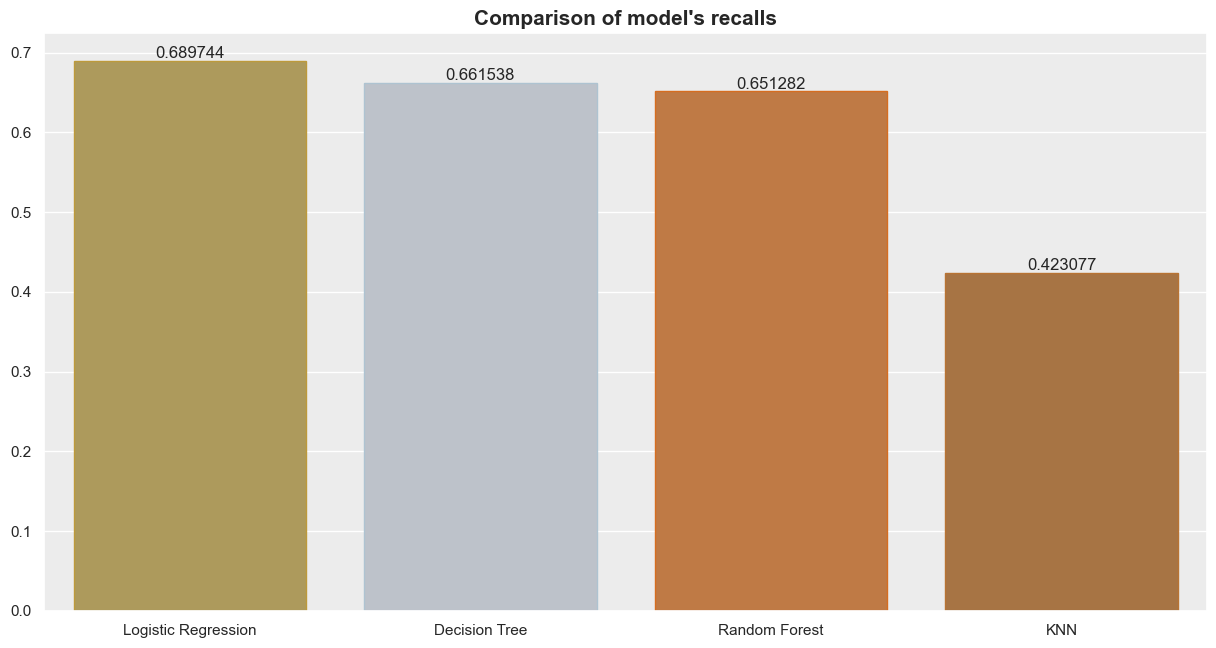

In [117]:
olympic_medals_palette = ['#BBA14F','#BBC2CC', '#D37731', '#B87333', '#B87333']
olympic_medals_edge_colors = ['#BD9A3B','#AEC3D1', '#D66D20', '#B87333', '#B87333']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot

plt.figure(figsize = (15,7.5))
ax = sns.barplot(x = list(recalls.keys()), y = list(recalls.values()), palette = olympic_medals_palette,  edgecolor = olympic_medals_edge_colors, order=df_models.sort_values("Recall", ascending=False).Model)
plt.title(label = "Comparison of model's recalls", fontsize = 15, fontweight = 'bold', ha = 'center')
ax.bar_label(ax.containers[0], label_type = 'edge', fontsize = 12)

plt.show()

# End of Normalization Part

# Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the numerical features to be standardized
numerical_features = ['CreditScore', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Age', 'Tenure']

# Perform standardization on the selected features
scaler = StandardScaler()
standard_encoded[numerical_features] = scaler.fit_transform(standard_encoded[numerical_features])


# LR WITH SMOTE

In [74]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

X1 = standard_encoded.drop('Exited', axis=1)
y1 = standard_encoded['Exited']

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
}

# Initialize the LR model
model = LogisticRegression(solver='liblinear')

# Initialize a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy')

# Lists to store results
best_scores = []
best_params = []
best_precisions = []
best_recalls = []
best_f1_scores = []

# Loop through each fold
for train_index, test_index in stratified_kfold.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

    # Apply SMOTE to the training data within the fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X1_train_resampled, y1_train_resampled = smote.fit_resample(X1_train, y1_train)

    # Perform hyperparameter tuning using GridSearchCV on the resampled training data
    grid_search.fit(X1_train_resampled, y1_train_resampled)

    # Get the best hyperparameters and score
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

    # Train the model with the best hyperparameters on the full training fold
    best_model = grid_search.best_estimator_
    best_model.fit(X1_train_resampled, y1_train_resampled)

    # Evaluate the model on the test fold
    y1_pred = best_model.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_pred)
    print(f'Accuracy on this fold: {accuracy}')

    # Calculate and store precision, recall, and F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(y1_test, y1_pred, average='weighted')
    best_precisions.append(precision)
    best_recalls.append(recall)
    best_f1_scores.append(f1)

# Display the best hyperparameters, their corresponding scores, and other metrics for each fold
for fold, (params, score, precision, recall, f1) in enumerate(zip(best_params, best_scores, best_precisions, best_recalls, best_f1_scores)):
    print(f'Fold {fold + 1}: Best Params - {params}, Best Score - {score}')
    print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

Accuracy on this fold: 0.7534456355283308
Accuracy on this fold: 0.7565084226646248
Accuracy on this fold: 0.7376212353241449
Accuracy on this fold: 0.7442572741194488
Accuracy on this fold: 0.7478305257784584
Fold 1: Best Params - {'C': 1.0, 'penalty': 'l1'}, Best Score - 0.7941170193677264
Precision: 0.7850720062909454, Recall: 0.7534456355283308, F1 Score: 0.7659047853459521
Fold 2: Best Params - {'C': 1.0, 'penalty': 'l1'}, Best Score - 0.795632519741679
Precision: 0.7957704904526288, Recall: 0.7565084226646248, F1 Score: 0.7709593517206355
Fold 3: Best Params - {'C': 0.1, 'penalty': 'l1'}, Best Score - 0.7973852219658631
Precision: 0.7818914480614981, Recall: 0.7376212353241449, F1 Score: 0.7540515079929632
Fold 4: Best Params - {'C': 1.0, 'penalty': 'l1'}, Best Score - 0.797704645745436
Precision: 0.792795241843614, Recall: 0.7442572741194488, F1 Score: 0.761417117269457
Fold 5: Best Params - {'C': 10.0, 'penalty': 'l1'}, Best Score - 0.7937659195635743
Precision: 0.7917690047357

In [87]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(C = 1.0,max_iter = 1000)
logr.fit(X1_train_resampled, y1_train_resampled)
y1_predict_lr = logr.predict(X1_test)
generate_model_report(y1_test, y1_predict_lr)

Accuracy =  0.6559469116896376
Precision =  0.32973621103117506
Recall =  0.7051282051282052
F1 Score =  0.4493464052287582


# KNN WITH SMOTE

In [79]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

X1 = standard_encoded.drop('Exited', axis=1)
y1 = standard_encoded['Exited']

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
}

# Initialize the KNN model
model = KNeighborsClassifier()

# Initialize a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy')

# Lists to store results
best_scores = []
best_params = []
best_precisions = []
best_recalls = []
best_f1_scores = []

# Loop through each fold
for train_index, test_index in stratified_kfold.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

    # Apply SMOTE to the training data within the fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X1_train_resampled, y1_train_resampled = smote.fit_resample(X1_train, y1_train)

    # Perform hyperparameter tuning using GridSearchCV on the resampled training data
    grid_search.fit(X1_train_resampled, y1_train_resampled)

    # Get the best hyperparameters and score
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

    # Train the model with the best hyperparameters on the full training fold
    best_model = grid_search.best_estimator_
    best_model.fit(X1_train_resampled, y1_train_resampled)

    # Evaluate the model on the test fold
    y1_pred = best_model.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_pred)
    print(f'Accuracy on this fold: {accuracy}')

    # Calculate and store precision, recall, and F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(y1_test, y1_pred, average='weighted')
    best_precisions.append(precision)
    best_recalls.append(recall)
    best_f1_scores.append(f1)

# Display the best hyperparameters, their corresponding scores, and other metrics for each fold
for fold, (params, score, precision, recall, f1) in enumerate(zip(best_params, best_scores, best_precisions, best_recalls, best_f1_scores)):
    print(f'Fold {fold + 1}: Best Params - {params}, Best Score - {score}')
    print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

Accuracy on this fold: 0.5778458397141398
Accuracy on this fold: 0.6049004594180705
Accuracy on this fold: 0.5768249106687086
Accuracy on this fold: 0.6043899948953547
Accuracy on this fold: 0.6105155691679428
Fold 1: Best Params - {'n_neighbors': 5, 'weights': 'distance'}, Best Score - 0.7118592667988867
Precision: 0.6872718031473156, Recall: 0.5778458397141398, F1 Score: 0.6169711055742352
Fold 2: Best Params - {'n_neighbors': 7, 'weights': 'distance'}, Best Score - 0.7017373312648172
Precision: 0.6930682421859881, Recall: 0.6049004594180705, F1 Score: 0.6383275650228598
Fold 3: Best Params - {'n_neighbors': 7, 'weights': 'distance'}, Best Score - 0.7063614176216617
Precision: 0.6891507281788405, Recall: 0.5768249106687086, F1 Score: 0.6164411583948112
Fold 4: Best Params - {'n_neighbors': 3, 'weights': 'distance'}, Best Score - 0.713534447304445
Precision: 0.6956605544135115, Recall: 0.6043899948953547, F1 Score: 0.6384735599789637
Fold 5: Best Params - {'n_neighbors': 3, 'weights':

In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3, weights='distance')
knn.fit(X1_train_resampled, y1_train_resampled)
y1_predict_knn = knn.predict(X1_test)
generate_model_report(y1_test, y1_predict_knn)

Accuracy =  0.6105155691679428
Precision =  0.2261380323054332
Recall =  0.39487179487179486
F1 Score =  0.2875816993464052


# DT WITH SMOTE

In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

X1 = standard_encoded.drop('Exited', axis=1)
y1 = standard_encoded['Exited']

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Adjust the depth as needed
    'min_samples_split': [2, 5, 10],  # Adjust the split criterion as needed
}

# Initialize the Decision Tree model
model = DecisionTreeClassifier()

# Initialize a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy')

# Lists to store results
best_scores = []
best_params = []

# Loop through each fold
for train_index, test_index in stratified_kfold.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

    # Apply SMOTE to the training data within the fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X1_train_resampled, y1_train_resampled = smote.fit_resample(X1_train, y1_train)

    # Perform hyperparameter tuning using GridSearchCV on the resampled training data
    grid_search.fit(X1_train_resampled, y1_train_resampled)

    # Get the best hyperparameters and score
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

    # Train the model with the best hyperparameters on the full training fold
    best_model = grid_search.best_estimator_
    best_model.fit(X1_train_resampled, y1_train_resampled)

    # Evaluate the model on the test fold
    y1_pred = best_model.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_pred)
    print(f'Accuracy on this fold: {accuracy}')

# Display the best hyperparameters and their corresponding scores for each fold
for fold, (params, score) in enumerate(zip(best_params, best_scores)):
    print(f'Fold {fold + 1}: Best Params - {params}, Best Score - {score}')


Accuracy on this fold: 0.7667177131189382
Accuracy on this fold: 0.7585502807554875
Accuracy on this fold: 0.7611026033690659
Accuracy on this fold: 0.7621235324144972
Accuracy on this fold: 0.777947932618683
Fold 1: Best Params - {'max_depth': 10, 'min_samples_split': 10}, Best Score - 0.8056755679553607
Fold 2: Best Params - {'max_depth': 10, 'min_samples_split': 10}, Best Score - 0.8065524113192508
Fold 3: Best Params - {'max_depth': 10, 'min_samples_split': 5}, Best Score - 0.805356652306676
Fold 4: Best Params - {'max_depth': 10, 'min_samples_split': 2}, Best Score - 0.8066323149014145
Fold 5: Best Params - {'max_depth': 10, 'min_samples_split': 2}, Best Score - 0.8024556254580798


In [82]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth= 10, min_samples_split = 2, random_state = 42)
dt.fit(X1_train_resampled, y1_train_resampled)
y1_predict_dt = dt.predict(X1_test)
generate_model_report(y1_test, y1_predict_dt)

Accuracy =  0.7784583971413986
Precision =  0.4618055555555556
Recall =  0.6820512820512821
F1 Score =  0.5507246376811594


# RF WITH SMOTE

In [77]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

X1 = standard_encoded.drop('Exited', axis=1)
y1 = standard_encoded['Exited']

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]

}

# Initialize the model
model = RandomForestClassifier()

# Initialize a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy')

# Lists to store results
best_scores = []
best_params = []
best_precisions = []
best_recalls = []
best_f1_scores = []

# Loop through each fold
for train_index, test_index in stratified_kfold.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

    # Apply SMOTE to the training data within the fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X1_train_resampled, y1_train_resampled = smote.fit_resample(X1_train, y1_train)

    # Perform hyperparameter tuning using GridSearchCV on the resampled training data
    grid_search.fit(X1_train_resampled, y1_train_resampled)

    # Get the best hyperparameters and score
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

    # Train the model with the best hyperparameters on the full training fold
    best_model = grid_search.best_estimator_
    best_model.fit(X1_train_resampled, y1_train_resampled)

    # Evaluate the model on the test fold
    y1_pred = best_model.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_pred)
    print(f'Accuracy on this fold: {accuracy}')

    # Calculate and store precision, recall, and F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(y1_test, y1_pred, average='weighted')
    best_precisions.append(precision)
    best_recalls.append(recall)
    best_f1_scores.append(f1)

# Display the best hyperparameters, their corresponding scores, and other metrics for each fold
for fold, (params, score, precision, recall, f1) in enumerate(zip(best_params, best_scores, best_precisions, best_recalls, best_f1_scores)):
    print(f'Fold {fold + 1}: Best Params - {params}, Best Score - {score}')
    print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

Accuracy on this fold: 0.812149055640633
Accuracy on this fold: 0.8044920877998979
Accuracy on this fold: 0.8167432363450741
Accuracy on this fold: 0.7983665135273098
Accuracy on this fold: 0.8162327718223583
Fold 1: Best Params - {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}, Best Score - 0.8571650107422046
Precision: 0.8188512821210076, Recall: 0.812149055640633, F1 Score: 0.8151919475842031
Fold 2: Best Params - {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}, Best Score - 0.8595571321727835
Precision: 0.8168694535488005, Recall: 0.8044920877998979, F1 Score: 0.8097761851370904
Fold 3: Best Params - {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}, Best Score - 0.8593972932502751
Precision: 0.825402037877651, Recall: 0.8167432363450741, F1 Score: 0.820543938832992
Fold 4: Best Params - {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 100}, Best Score - 0.8629840939152915
Precision: 0.8127228139734008, Recall: 0.798366513527309

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=20,min_samples_leaf = 1, random_state=42)
rf.fit(X1_train_resampled, y1_train_resampled)
y1_predict_rf = rf.predict(X1_test)
generate_model_report(y1_test, y1_predict_rf)

Accuracy =  0.8182746299132211
Precision =  0.5360169491525424
Recall =  0.6487179487179487
F1 Score =  0.5870069605568446


# Adaboost WITH SMOTE

In [78]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

X1 = standard_encoded.drop('Exited', axis=1)
y1 = standard_encoded['Exited']

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

# Initialize the AdaBoostClassifier model
base_model = DecisionTreeClassifier(max_depth=1)  # You can customize the base model
model = AdaBoostClassifier(base_model)


# Initialize a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy')

# Lists to store results
best_scores = []
best_params = []
best_precisions = []
best_recalls = []
best_f1_scores = []

# Loop through each fold
for train_index, test_index in stratified_kfold.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

    # Apply SMOTE to the training data within the fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X1_train_resampled, y1_train_resampled = smote.fit_resample(X1_train, y1_train)

    # Perform hyperparameter tuning using GridSearchCV on the resampled training data
    grid_search.fit(X1_train_resampled, y1_train_resampled)

    # Get the best hyperparameters and score
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

    # Train the model with the best hyperparameters on the full training fold
    best_model = grid_search.best_estimator_
    best_model.fit(X1_train_resampled, y1_train_resampled)

    # Evaluate the model on the test fold
    y1_pred = best_model.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_pred)
    print(f'Accuracy on this fold: {accuracy}')

    # Calculate and store precision, recall, and F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(y1_test, y1_pred, average='weighted')
    best_precisions.append(precision)
    best_recalls.append(recall)
    best_f1_scores.append(f1)

# Display the best hyperparameters, their corresponding scores, and other metrics for each fold
for fold, (params, score, precision, recall, f1) in enumerate(zip(best_params, best_scores, best_precisions, best_recalls, best_f1_scores)):
    print(f'Fold {fold + 1}: Best Params - {params}, Best Score - {score}')
    print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

Accuracy on this fold: 0.7886676875957122
Accuracy on this fold: 0.7840735068912711
Accuracy on this fold: 0.7830525778458397
Accuracy on this fold: 0.7708014293006636
Accuracy on this fold: 0.7927514037774375
Fold 1: Best Params - {'learning_rate': 1.0, 'n_estimators': 200}, Best Score - 0.8141242919910633
Precision: 0.8209779109813313, Recall: 0.7886676875957122, F1 Score: 0.800249578068238
Fold 2: Best Params - {'learning_rate': 1.0, 'n_estimators': 200}, Best Score - 0.8230508496107241
Precision: 0.8208663294685403, Recall: 0.7840735068912711, F1 Score: 0.7968884817145256
Fold 3: Best Params - {'learning_rate': 1.0, 'n_estimators': 200}, Best Score - 0.8252827827788091
Precision: 0.8137053412374489, Recall: 0.7830525778458397, F1 Score: 0.7943927663743054
Fold 4: Best Params - {'learning_rate': 1.0, 'n_estimators': 50}, Best Score - 0.8234495735670313
Precision: 0.8142642969475865, Recall: 0.7708014293006636, F1 Score: 0.7856501882312303
Fold 5: Best Params - {'learning_rate': 1.0,

In [80]:
from sklearn.ensemble import AdaBoostClassifier

# Your AdaBoost code
adaboost_model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),  # Example base estimator
    n_estimators=200,  # Number of weak learners
    learning_rate=1.0  # Learning rate
)

adaboost_model.fit(X1_train_resampled, y1_train_resampled)
y1_predict_adaboost = adaboost_model.predict(X1_test)

# Generate the model report for AdaBoost
generate_model_report(y1_test, y1_predict_adaboost)

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


Accuracy =  0.7912200102092904
Precision =  0.4829443447037702
Recall =  0.6897435897435897
F1 Score =  0.5681098204857444


In [88]:
accuracies = {"AdaBoost":accuracy_score(y1_test,y1_pred), "KNN":accuracy_score(y1_test,y1_predict_knn), "Decision Tree":accuracy_score(y1_test,y1_predict_dt), "Random Forest":accuracy_score(y1_test,y1_predict_rf), "Logistic Regression":accuracy_score(y1_test,y1_predict_lr)}
print("The best accuracy  score has the model: ", max(accuracies, key=accuracies.get))

precisions = {"AdaBoost":precision_score(y1_test,y1_pred), "KNN":precision_score(y1_test,y1_predict_knn), "Decision Tree":precision_score(y1_test,y1_predict_dt), "Random Forest":precision_score(y1_test,y1_predict_rf), "Logistic Regression":precision_score(y1_test,y1_predict_lr)}
print("The best precision score has the model: ", max(precisions, key=precisions.get))

recalls = {"AdaBoost":recall_score(y1_test,y1_pred),"KNN":recall_score(y1_test,y1_predict_knn), "Decision Tree":recall_score(y1_test,y1_predict_dt), "Random Forest":recall_score(y1_test,y1_predict_rf), "Logistic Regression":recall_score(y1_test,y1_predict_lr)}
print("The best recall score has the model: ", max(recalls, key=recalls.get))

f1_scores = {"AdaBoost":f1_score(y1_test,y1_pred), "KNN":f1_score(y1_test,y1_predict_knn), "Decision Tree":f1_score(y1_test,y1_predict_dt), "Random Forest":f1_score(y1_test,y1_predict_rf), "Logistic Regression":f1_score(y1_test,y1_predict_lr)}
print("The best f1_score     has the model: ", max(recalls, key=recalls.get))

The best accuracy  score has the model:  Random Forest
The best precision score has the model:  Random Forest
The best recall score has the model:  Logistic Regression
The best f1_score     has the model:  Logistic Regression


In [89]:
models_keys             = list(accuracies.keys())
accuracy_models_values  = list(accuracies.values())
#precision_models_keys   = list(precisions.keys())
precision_models_values = list(precisions.values())
recall_models_values    = list(recalls.values())
f1_score_models_values  = list(recalls.values())

df_models               = pd.DataFrame({"Model":models_keys,
                                       "Accuracy":accuracy_models_values,
                                       "Precision": precision_models_values,
                                       "Recall": recall_models_values,
                                       "F1_Score": f1_score_models_values})
print(df_models)

                 Model  Accuracy  Precision    Recall  F1_Score
0             AdaBoost  0.610516   0.226138  0.394872  0.394872
1                  KNN  0.610516   0.226138  0.394872  0.394872
2        Decision Tree  0.778458   0.461806  0.682051  0.682051
3        Random Forest  0.818275   0.536017  0.648718  0.648718
4  Logistic Regression  0.655947   0.329736  0.705128  0.705128


# Confusion Matrix of Best Model with Smote

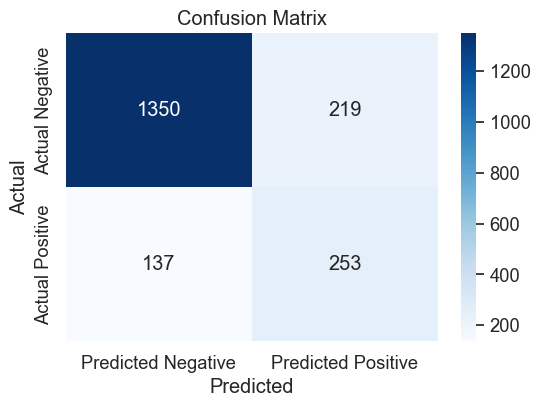

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_true is the true labels and y_pred is the predicted labels
conf_matrix = confusion_matrix(y1_test, y1_predict_rf)

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust the font scale for labels

sns.heatmap(
    conf_matrix,
    annot=True,  # Display values in the cells
    fmt="d",     # Integer formatting for values
    cmap="Blues",  # Color map
    xticklabels=["Predicted Negative", "Predicted Positive"],
    yticklabels=["Actual Negative", "Actual Positive"],
    cbar=True,
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Adasyn + Models

# LR WITH ADASYN

In [92]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN


X1 = standard_encoded.drop('Exited', axis=1)
y1 = standard_encoded['Exited']

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
}

# Initialize the LR model
model = LogisticRegression(solver='liblinear')

# Initialize a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy')

# Lists to store results
best_scores = []
best_params = []
best_precisions = []
best_recalls = []
best_f1_scores = []

# Loop through each fold
for train_index, test_index in stratified_kfold.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

    # Create an ADASYN resampler
    adasyn = ADASYN(sampling_strategy='auto', random_state=42)

    # Apply ADASYN to balance the dataset
    X1_adasyn, y1_adasyn = adasyn.fit_resample(X1_train, y1_train)

    
    # Perform hyperparameter tuning using GridSearchCV on the resampled training data
    grid_search.fit(X1_adasyn, y1_adasyn)

    # Get the best hyperparameters and score
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

    # Train the model with the best hyperparameters on the full training fold
    best_model = grid_search.best_estimator_
    best_model.fit(X1_adasyn, y1_adasyn)

    # Evaluate the model on the test fold
    y1_predict_lr = best_model.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_predict_lr)
    print(f'Accuracy on this fold: {accuracy}')

    # Calculate and store precision, recall, and F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(y1_test, y1_predict_lr, average='weighted')
    best_precisions.append(precision)
    best_recalls.append(recall)
    best_f1_scores.append(f1)

# Display the best hyperparameters, their corresponding scores, and other metrics for each fold
for fold, (params, score, precision, recall, f1) in enumerate(zip(best_params, best_scores, best_precisions, best_recalls, best_f1_scores)):
    print(f'Fold {fold + 1}: Best Params - {params}, Best Score - {score}')
    print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

Accuracy on this fold: 0.7539561000510464
Accuracy on this fold: 0.7524247064828994
Accuracy on this fold: 0.742215416028586
Accuracy on this fold: 0.7401735579377233
Accuracy on this fold: 0.743746809596733
Fold 1: Best Params - {'C': 10.0, 'penalty': 'l1'}, Best Score - 0.7952875399361022
Precision: 0.784809688363425, Recall: 0.7539561000510464, F1 Score: 0.7661718130774982
Fold 2: Best Params - {'C': 1.0, 'penalty': 'l1'}, Best Score - 0.792457562365471
Precision: 0.7935595214810012, Recall: 0.7524247064828994, F1 Score: 0.7674971545231072
Fold 3: Best Params - {'C': 10.0, 'penalty': 'l1'}, Best Score - 0.7974481658692185
Precision: 0.783770949283137, Recall: 0.742215416028586, F1 Score: 0.7577788746584065
Fold 4: Best Params - {'C': 0.1, 'penalty': 'l1'}, Best Score - 0.7961885855259185
Precision: 0.7906633249154943, Recall: 0.7401735579377233, F1 Score: 0.7579559445301443
Fold 5: Best Params - {'C': 0.1, 'penalty': 'l1'}, Best Score - 0.7951864125800505
Precision: 0.78960381604526

In [93]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(C =10.0, max_iter = 1000)
logr.fit(X1_adasyn, y1_adasyn)
y1_predict_lr = logr.predict(X1_test)
generate_model_report(y1_test, y1_predict_lr)

Accuracy =  0.6636038795303726
Precision =  0.3333333333333333
Recall =  0.6897435897435897
F1 Score =  0.4494569757727653


# KNN WITH AdASYN

In [90]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

X1 = standard_encoded.drop('Exited', axis=1)
y1 = standard_encoded['Exited']

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
}

# Initialize the KNN model
model = KNeighborsClassifier()

# Initialize a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy')

# Lists to store results
best_scores = []
best_params = []
best_precisions = []
best_recalls = []
best_f1_scores = []

# Loop through each fold
for train_index, test_index in stratified_kfold.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

   # Create an ADASYN resampler
    adasyn = ADASYN(sampling_strategy='auto', random_state=42)

    # Apply ADASYN to balance the dataset
    X1_adasyn, y1_adasyn = adasyn.fit_resample(X1_train, y1_train)


    # Perform hyperparameter tuning using GridSearchCV on the resampled training data
    grid_search.fit(X1_adasyn, y1_adasyn)

    # Get the best hyperparameters and score
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

    # Train the model with the best hyperparameters on the full training fold
    best_model = grid_search.best_estimator_
    best_model.fit(X1_adasyn, y1_adasyn)

    # Evaluate the model on the test fold
    y1_predict_knn = best_model.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_predict_knn)
    print(f'Accuracy on this fold: {accuracy}')

    # Calculate and store precision, recall, and F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(y1_test, y1_predict_knn, average='weighted')
    best_precisions.append(precision)
    best_recalls.append(recall)
    best_f1_scores.append(f1)

# Display the best hyperparameters, their corresponding scores, and other metrics for each fold
for fold, (params, score, precision, recall, f1) in enumerate(zip(best_params, best_scores, best_precisions, best_recalls, best_f1_scores)):
    print(f'Fold {fold + 1}: Best Params - {params}, Best Score - {score}')
    print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

Accuracy on this fold: 0.5523226135783563
Accuracy on this fold: 0.5803981623277182
Accuracy on this fold: 0.5747830525778458
Accuracy on this fold: 0.5972434915773354
Accuracy on this fold: 0.5921388463501787
Fold 1: Best Params - {'n_neighbors': 3, 'weights': 'distance'}, Best Score - 0.6908945686900959
Precision: 0.6819373544692363, Recall: 0.5523226135783563, F1 Score: 0.5959983292366641
Fold 2: Best Params - {'n_neighbors': 3, 'weights': 'distance'}, Best Score - 0.6921292580720564
Precision: 0.6831677499276624, Recall: 0.5803981623277182, F1 Score: 0.618274922129048
Fold 3: Best Params - {'n_neighbors': 3, 'weights': 'distance'}, Best Score - 0.6964912280701754
Precision: 0.6850468780126024, Recall: 0.5747830525778458, F1 Score: 0.6142741050488455
Fold 4: Best Params - {'n_neighbors': 3, 'weights': 'distance'}, Best Score - 0.6922099898102079
Precision: 0.6992596611557242, Recall: 0.5972434915773354, F1 Score: 0.6337346966073606
Fold 5: Best Params - {'n_neighbors': 5, 'weights':

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, weights= 'distance')
knn.fit(X1_adasyn, y1_adasyn)
y1_predict_knn = knn.predict(X1_test)
generate_model_report(y1_test, y1_predict_knn)

Accuracy =  0.6023481368044921
Precision =  0.22948539638386647
Recall =  0.4230769230769231
F1 Score =  0.2975653742110009


# DT WITH ADASYN

In [95]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

X1 = standard_encoded.drop('Exited', axis=1)
y1 = standard_encoded['Exited']

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Adjust the depth as needed
    'min_samples_split': [2, 5, 10],  # Adjust the split criterion as needed
}

# Initialize the Decision Tree model
model = DecisionTreeClassifier()

# Initialize a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy')

# Lists to store results
best_scores = []
best_params = []

# Loop through each fold
for train_index, test_index in stratified_kfold.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

   # Create an ADASYN resampler
    adasyn = ADASYN(sampling_strategy='auto', random_state=42)

    # Apply ADASYN to balance the dataset
    X1_adasyn, y1_adasyn = adasyn.fit_resample(X1_train, y1_train)


    # Perform hyperparameter tuning using GridSearchCV on the resampled training data
    grid_search.fit(X1_adasyn, y1_adasyn)

    # Get the best hyperparameters and score
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

    # Train the model with the best hyperparameters on the full training fold
    best_model = grid_search.best_estimator_
    best_model.fit(X1_adasyn, y1_adasyn)

    # Evaluate the model on the test fold
    y1_predict_dt = best_model.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_predict_dt)
    print(f'Accuracy on this fold: {accuracy}')

# Display the best hyperparameters and their corresponding scores for each fold
for fold, (params, score) in enumerate(zip(best_params, best_scores)):
    print(f'Fold {fold + 1}: Best Params - {params}, Best Score - {score}')


Accuracy on this fold: 0.7886676875957122
Accuracy on this fold: 0.7432363450740174
Accuracy on this fold: 0.7667177131189382
Accuracy on this fold: 0.7662072485962226
Accuracy on this fold: 0.7682491066870852
Fold 1: Best Params - {'max_depth': 10, 'min_samples_split': 10}, Best Score - 0.8031948881789137
Fold 2: Best Params - {'max_depth': 10, 'min_samples_split': 2}, Best Score - 0.8023064025910356
Fold 3: Best Params - {'max_depth': 10, 'min_samples_split': 2}, Best Score - 0.8091706539074959
Fold 4: Best Params - {'max_depth': 10, 'min_samples_split': 5}, Best Score - 0.8083092891110344
Fold 5: Best Params - {'max_depth': 10, 'min_samples_split': 10}, Best Score - 0.8076990404265759


In [97]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 10, min_samples_split = 2, random_state = 42)
dt.fit(X1_adasyn, y1_adasyn)
y1_predict_dt = dt.predict(X1_test)
generate_model_report(y1_test, y1_predict_dt)

Accuracy =  0.7656967840735069
Precision =  0.441025641025641
Recall =  0.6615384615384615
F1 Score =  0.5292307692307692


# RF WITH ADASYN

In [96]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

X1 = standard_encoded.drop('Exited', axis=1)
y1 = standard_encoded['Exited']


# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]

}

# Initialize the model
model = RandomForestClassifier()

# Initialize a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy')

# Lists to store results
best_scores = []
best_params = []
best_precisions = []
best_recalls = []
best_f1_scores = []

# Loop through each fold
for train_index, test_index in stratified_kfold.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

    #Create an ADASYN resampler
    adasyn = ADASYN(sampling_strategy='auto', random_state=42)

    # Apply ADASYN to balance the dataset
    X1_adasyn, y1_adasyn = adasyn.fit_resample(X1_train, y1_train)


    # Perform hyperparameter tuning using GridSearchCV on the resampled training data
    grid_search.fit(X1_adasyn, y1_adasyn)

    # Get the best hyperparameters and score
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

    # Train the model with the best hyperparameters on the full training fold
    best_model = grid_search.best_estimator_
    best_model.fit(X1_adasyn, y1_adasyn)

    # Evaluate the model on the test fold
    y1_predict_ada = best_model.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_predict_ada)
    print(f'Accuracy on this fold: {accuracy}')

    # Calculate and store precision, recall, and F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(y1_test, y1_predict_ada, average='weighted')
    best_precisions.append(precision)
    best_recalls.append(recall)
    best_f1_scores.append(f1)

# Display the best hyperparameters, their corresponding scores, and other metrics for each fold
for fold, (params, score, precision, recall, f1) in enumerate(zip(best_params, best_scores, best_precisions, best_recalls, best_f1_scores)):
    print(f'Fold {fold + 1}: Best Params - {params}, Best Score - {score}')
    print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

Accuracy on this fold: 0.8177641653905053
Accuracy on this fold: 0.7953037263910159
Accuracy on this fold: 0.8131699846860643
Accuracy on this fold: 0.7942827973455845
Accuracy on this fold: 0.819806023481368
Fold 1: Best Params - {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}, Best Score - 0.851038338658147
Precision: 0.8248609227385194, Recall: 0.8177641653905053, F1 Score: 0.8209451113185473
Fold 2: Best Params - {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 100}, Best Score - 0.8536315636409807
Precision: 0.8111058970850183, Recall: 0.7953037263910159, F1 Score: 0.8019018539318705
Fold 3: Best Params - {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 100}, Best Score - 0.8566188197767145
Precision: 0.8257292172747077, Recall: 0.8131699846860643, F1 Score: 0.8184322218345607
Fold 4: Best Params - {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}, Best Score - 0.8634082534137075
Precision: 0.8118724577271105, Recall: 0.794282797345584

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=1, random_state =42)
rf.fit(X1_adasyn, y1_adasyn)
y1_predict_rf = rf.predict(X1_test)
generate_model_report(y1_test, y1_predict_rf)

Accuracy =  0.8203164880040837
Precision =  0.5404255319148936
Recall =  0.6512820512820513
F1 Score =  0.5906976744186045


# ADABOOST WITH ADASYN

In [99]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

X1 = standard_encoded.drop('Exited', axis=1)
y1 = standard_encoded['Exited']


# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

# Initialize the AdaBoostClassifier model
base_model = DecisionTreeClassifier(max_depth=1)  # You can customize the base model
model = AdaBoostClassifier(base_model)


# Initialize a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy')

# Lists to store results
best_scores = []
best_params = []
best_precisions = []
best_recalls = []
best_f1_scores = []

# Loop through each fold
for train_index, test_index in stratified_kfold.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

      #Create an ADASYN resampler
    adasyn = ADASYN(sampling_strategy='auto', random_state=42)

    # Apply ADASYN to balance the dataset
    X1_adasyn, y1_adasyn = adasyn.fit_resample(X1_train, y1_train)


    # Perform hyperparameter tuning using GridSearchCV on the resampled training data
    grid_search.fit(X1_adasyn, y1_adasyn)

    # Get the best hyperparameters and score
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

    # Train the model with the best hyperparameters on the full training fold
    best_model = grid_search.best_estimator_
    best_model.fit(X1_adasyn, y1_adasyn)

    # Evaluate the model on the test fold
    y1_pred = best_model.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_pred)
    print(f'Accuracy on this fold: {accuracy}')

    # Calculate and store precision, recall, and F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(y1_test, y1_pred, average='weighted')
    best_precisions.append(precision)
    best_recalls.append(recall)
    best_f1_scores.append(f1)

# Display the best hyperparameters, their corresponding scores, and other metrics for each fold
for fold, (params, score, precision, recall, f1) in enumerate(zip(best_params, best_scores, best_precisions, best_recalls, best_f1_scores)):
    print(f'Fold {fold + 1}: Best Params - {params}, Best Score - {score}')
    print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    

Accuracy on this fold: 0.7917304747320061
Accuracy on this fold: 0.7901990811638591
Accuracy on this fold: 0.7799897907095457
Accuracy on this fold: 0.7702909647779479
Accuracy on this fold: 0.7901990811638591
Fold 1: Best Params - {'learning_rate': 1.0, 'n_estimators': 100}, Best Score - 0.8141373801916932
Precision: 0.8247265241728621, Recall: 0.7917304747320061, F1 Score: 0.8033730079415123
Fold 2: Best Params - {'learning_rate': 1.0, 'n_estimators': 100}, Best Score - 0.8141576457000603
Precision: 0.8254789096884135, Recall: 0.7901990811638591, F1 Score: 0.8024319496595561
Fold 3: Best Params - {'learning_rate': 1.0, 'n_estimators': 200}, Best Score - 0.8216108452950557
Precision: 0.8156890063977187, Recall: 0.7799897907095457, F1 Score: 0.7927019486016571
Fold 4: Best Params - {'learning_rate': 1.0, 'n_estimators': 200}, Best Score - 0.8202695813413021
Precision: 0.8130464109622995, Recall: 0.7702909647779479, F1 Score: 0.7850090620792447
Fold 5: Best Params - {'learning_rate': 1.

In [100]:
from sklearn.ensemble import AdaBoostClassifier

# Your AdaBoost code
adaboost_model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),  # Example base estimator
    n_estimators=200,  # Number of weak learners
    learning_rate=1.0  # Learning rate
)

adaboost_model.fit(X1_adasyn, y1_adasyn)
y1_predict_adaboost = adaboost_model.predict(X1_test)

# Generate the model report for AdaBoost
generate_model_report(y1_test, y1_predict_adaboost)

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


Accuracy =  0.7881572230729964
Precision =  0.4772313296903461
Recall =  0.6717948717948717
F1 Score =  0.5580404685835996


In [101]:
accuracies = {"KNN":accuracy_score(y1_test,y1_predict_knn), "Decision Tree":accuracy_score(y1_test,y1_predict_dt), "Random Forest":accuracy_score(y1_test,y1_predict_rf), "Logistic Regression":accuracy_score(y1_test,y1_predict_lr)}
print("The best accuracy  score has the model: ", max(accuracies, key=accuracies.get))

precisions = {"KNN":precision_score(y1_test,y1_predict_knn), "Decision Tree":precision_score(y1_test,y1_predict_dt), "Random Forest":precision_score(y1_test,y1_predict_rf), "Logistic Regression":precision_score(y1_test,y1_predict_lr)}
print("The best precision score has the model: ", max(precisions, key=precisions.get))

recalls = {"KNN":recall_score(y1_test,y1_predict_knn), "Decision Tree":recall_score(y1_test,y1_predict_dt), "Random Forest":recall_score(y1_test,y1_predict_rf), "Logistic Regression":recall_score(y1_test,y1_predict_lr)}
print("The best recall score has the model: ", max(recalls, key=recalls.get))

f1_scores = {"KNN":f1_score(y1_test,y1_predict_knn), "Decision Tree":f1_score(y1_test,y1_predict_dt), "Random Forest":f1_score(y1_test,y1_predict_rf), "Logistic Regression":f1_score(y1_test,y1_predict_lr)}
print("The best f1_score     has the model: ", max(recalls, key=recalls.get))

The best accuracy  score has the model:  Random Forest
The best precision score has the model:  Random Forest
The best recall score has the model:  Logistic Regression
The best f1_score     has the model:  Logistic Regression


In [102]:
models_keys             = list(accuracies.keys())
accuracy_models_values  = list(accuracies.values())
#precision_models_keys   = list(precisions.keys())
precision_models_values = list(precisions.values())
recall_models_values    = list(recalls.values())
f1_score_models_values  = list(recalls.values())

df_models               = pd.DataFrame({"Model":models_keys,
                                       "Accuracy":accuracy_models_values,
                                       "Precision": precision_models_values,
                                       "Recall": recall_models_values,
                                       "F1_Score": f1_score_models_values})
print(df_models)

                 Model  Accuracy  Precision    Recall  F1_Score
0                  KNN  0.602348   0.229485  0.423077  0.423077
1        Decision Tree  0.765697   0.441026  0.661538  0.661538
2        Random Forest  0.820316   0.540426  0.651282  0.651282
3  Logistic Regression  0.663604   0.333333  0.689744  0.689744


# Confusion Matrix of Best Model with Adasyn

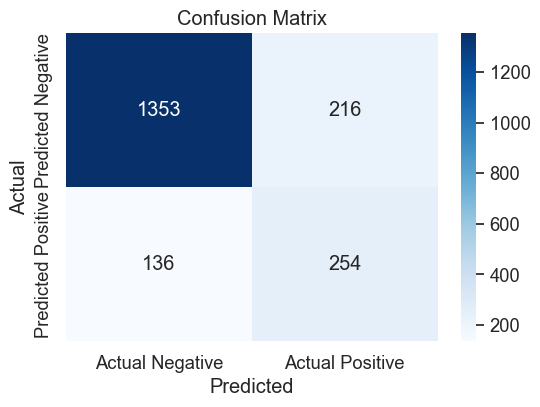

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_true is the true labels and y_pred is the predicted labels
conf_matrix = confusion_matrix(y1_test, y1_predict_rf)

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust the font scale for labels

sns.heatmap(
    conf_matrix,
    annot=True,  # Display values in the cells
    fmt="d",     # Integer formatting for values
    cmap="Blues",  # Color map
    xticklabels=["Actual Negative", "Actual Positive"],
    yticklabels=["Predicted Negative", "Predicted Positive"],
    cbar=True,
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Applying Explainable Ai to our Model with Standardization

# Shap & Lime is applied

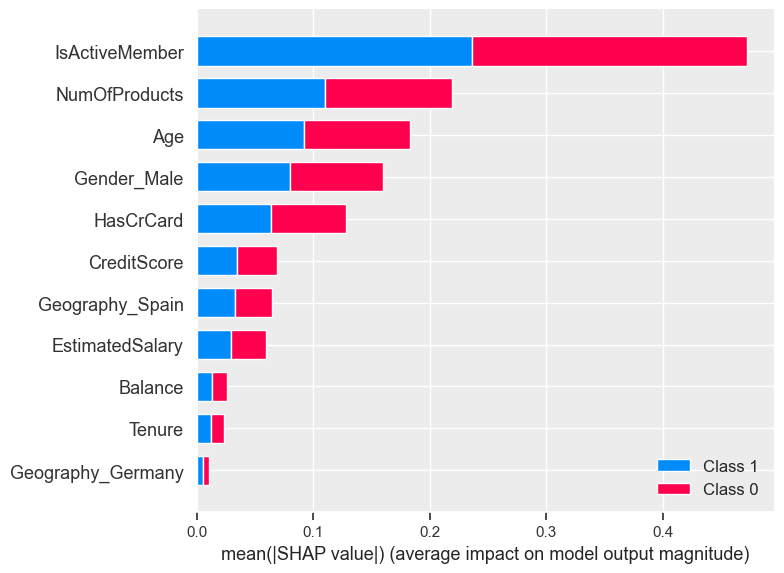

In [113]:
import shap

# Create a SHAP explainer for the trained model
explainer = shap.Explainer(rf)

# Calculate SHAP values for a specific instance (e.g., the first instance in your test data)
shap_values = explainer.shap_values(X1_test.iloc[0, :].values.reshape(1, -1))

# Visualize the SHAP values for the instance
shap.summary_plot(shap_values, X1_test)


In [114]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X1_test.values, training_labels=y1_adasyn, mode="classification")

explanation = explainer.explain_instance(X1_test.values[0], rf.predict_proba)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [115]:
explanation.show_in_notebook()

# Evaluation Graphs

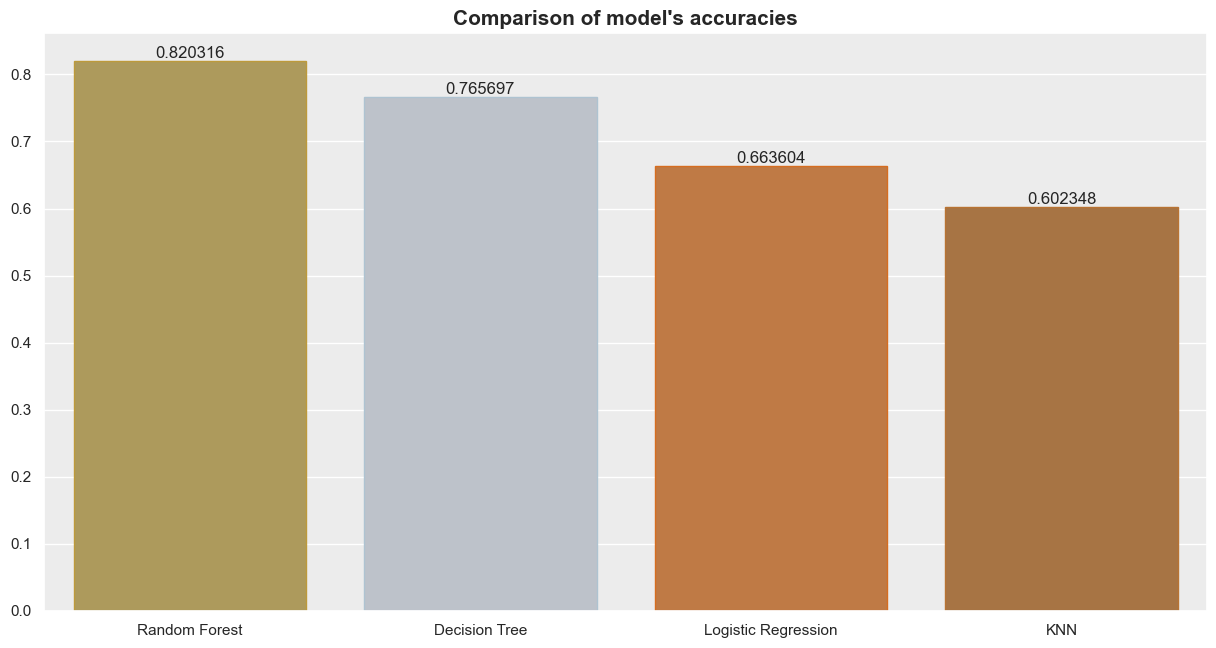

In [108]:
olympic_medals_palette = ['#BBA14F','#BBC2CC', '#D37731', '#B87333', '#B87333']
olympic_medals_edge_colors = ['#BD9A3B','#AEC3D1', '#D66D20', '#B87333', '#B87333']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot

plt.figure(figsize = (15,7.5))
ax = sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()), palette = olympic_medals_palette,  edgecolor = olympic_medals_edge_colors, order=df_models.sort_values('Accuracy', ascending=False).Model)
plt.title(label = "Comparison of model's accuracies", fontsize = 15, fontweight = 'bold', ha = 'center')
ax.bar_label(ax.containers[0], label_type = 'edge', fontsize = 12)

plt.show()

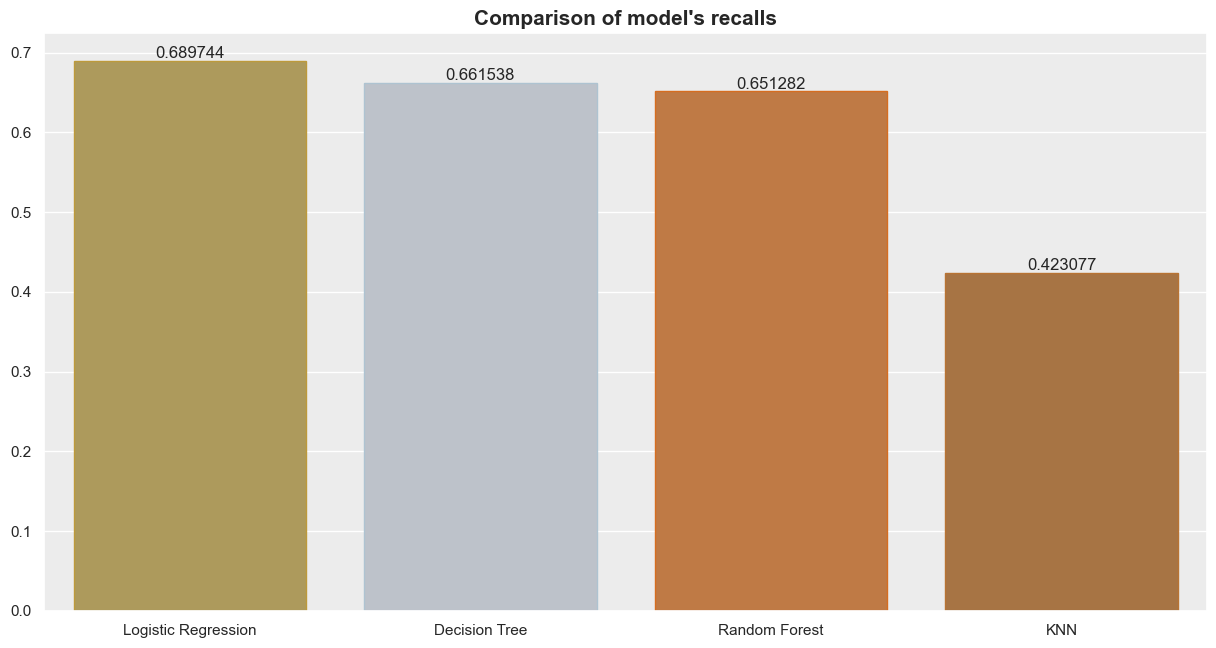

In [107]:
olympic_medals_palette = ['#BBA14F','#BBC2CC', '#D37731', '#B87333', '#B87333']
olympic_medals_edge_colors = ['#BD9A3B','#AEC3D1', '#D66D20', '#B87333', '#B87333']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot

plt.figure(figsize = (15,7.5))
ax = sns.barplot(x = list(recalls.keys()), y = list(recalls.values()), palette = olympic_medals_palette,  edgecolor = olympic_medals_edge_colors, order=df_models.sort_values("Recall", ascending=False).Model)
plt.title(label = "Comparison of model's recalls", fontsize = 15, fontweight = 'bold', ha = 'center')
ax.bar_label(ax.containers[0], label_type = 'edge', fontsize = 12)

plt.show()

# Conclusion

## We found out the Accuracy of Normalization with Smote Balancing Technique is better than  other applied feature scaling and balancing techniques

## Lime and Shap is a part of Explainable Ai which helps to visualize how are model is predicting and which feature is having a great impact on the prediction